# Correlation: dB vs CO2

In [1]:
#Packages import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os

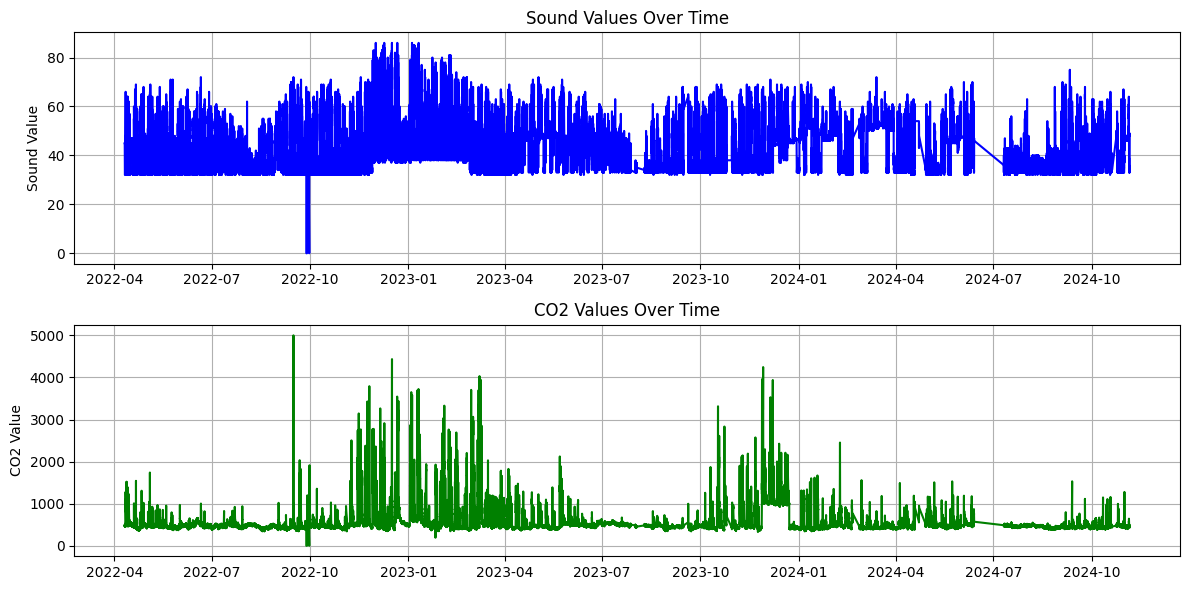

In [2]:
# Load the dataset
file_path = r'S:\OneDrive - Fondation EPF\Uni\5eme Année\Project(Σ.humans)\Coding\sum_humans\Data_Extraction and analysis\Data Extraction\raw_sensor_data.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Step 1: Plot sound_value and co2_value over time
plt.figure(figsize=(12, 6))

# Sound values over time
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['sound_value'], color='b', label='Sound Value')
plt.title('Sound Values Over Time')
plt.ylabel('Sound Value')
plt.grid(True)

# CO2 values over time
plt.subplot(2, 1, 2)
plt.plot(data['time'], data['co2_value'], color='g', label='CO2 Value')
plt.title('CO2 Values Over Time')
plt.ylabel('CO2 Value')
plt.grid(True)

plt.tight_layout()
plt.show()




Small Data set analysis: 
After #2024-06-12 22:32:34, no more data was collected for this month.(May be servers were sut down)

From 2022/09/27 to 2022/09/28, all the values for the sensors, read 0. This can be an error as co2 cannot usually be 0, rather than having jsut a low value.




In [3]:
## Data Cleaning

output_folder = "Cleaned_sound_db"

# Create the folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Remove rows where both sound_value and co2_value are 0
cleaned_data = data[(data['sound_value'] != 0) | (data['co2_value'] != 0)]

# Check if the cleaning was successful
print(cleaned_data.head())

# Optionally, save the cleaned data to a new CSV file
cleaned_data.to_csv('Cleaned_sound_db/cleaned_sensor_data.csv', index=False)

# Reverse the order of the DataFrame
df_reversed = cleaned_data.iloc[::-1].reset_index(drop=True)

# Save the reversed DataFrame to a new CSV file
output_file = os.path.join(output_folder, "inverted_cleaned_file.csv")
df_reversed.to_csv(output_file, index=False)

print(df_reversed.head())



                 time  sound_value  co2_value
0 2024-11-05 09:41:08         48.0      451.0
1 2024-11-05 09:30:53         47.0      475.0
2 2024-11-05 09:20:38         48.0      452.0
3 2024-11-05 09:10:23         48.0      463.0
4 2024-11-05 09:00:08         47.0      451.0
                 time  sound_value  co2_value
0 2022-04-10 17:20:05         45.0      473.0
1 2022-04-10 17:30:08         45.0      474.0
2 2022-04-10 17:40:06         45.0      466.0
3 2022-04-10 17:50:03         45.0      483.0
4 2022-04-10 18:00:12         45.0      501.0


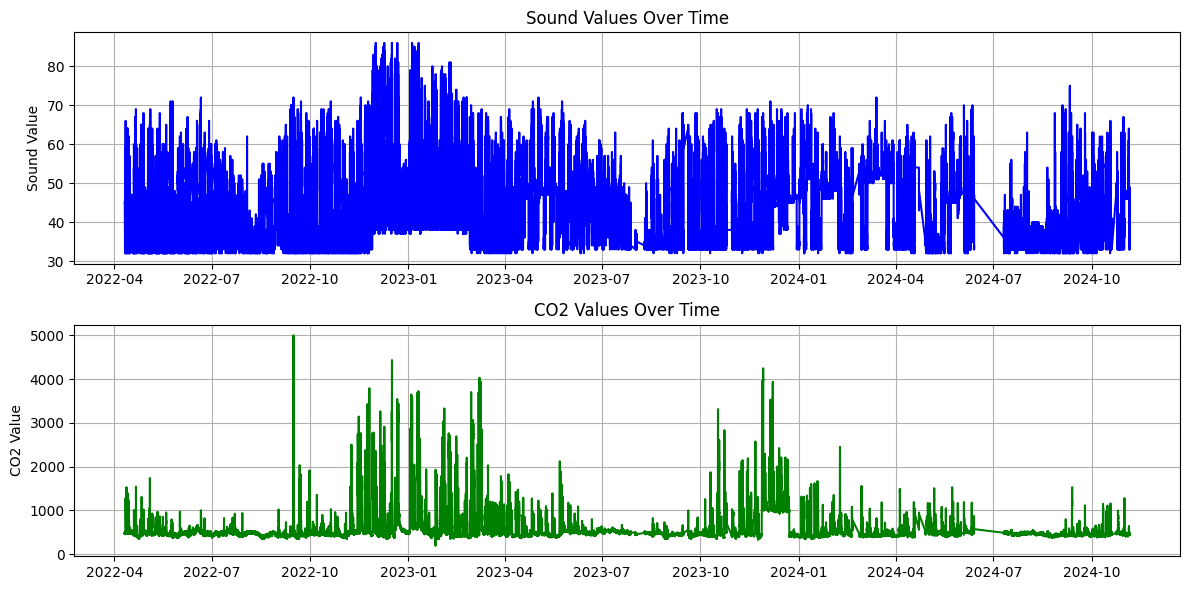

In [4]:

# Load the dataset
file_path = 'Cleaned_sound_db/inverted_cleaned_file.csv'
data = pd.read_csv(file_path)

# Convert 'time' column to datetime format for better plotting
data['time'] = pd.to_datetime(data['time'])

# Step 1: Plot sound_value and co2_value over time
plt.figure(figsize=(12, 6))

# Sound values over time
plt.subplot(2, 1, 1)
plt.plot(data['time'], data['sound_value'], color='b', label='Sound Value')
plt.title('Sound Values Over Time')
plt.ylabel('Sound Value')
plt.grid(True)

# CO2 values over time
plt.subplot(2, 1, 2)
plt.plot(data['time'], data['co2_value'], color='g', label='CO2 Value')
plt.title('CO2 Values Over Time')
plt.ylabel('CO2 Value')
plt.grid(True)

plt.tight_layout()
plt.show()



### Using time series to plot graph with 2 y-axis 

This is a visualization technique where two y-axes are used to represent variables with different ranges on the same time-based x-axis. It's helpful for visual comparisons between two variables that don't share the same scale (like CO₂ and sound levels).

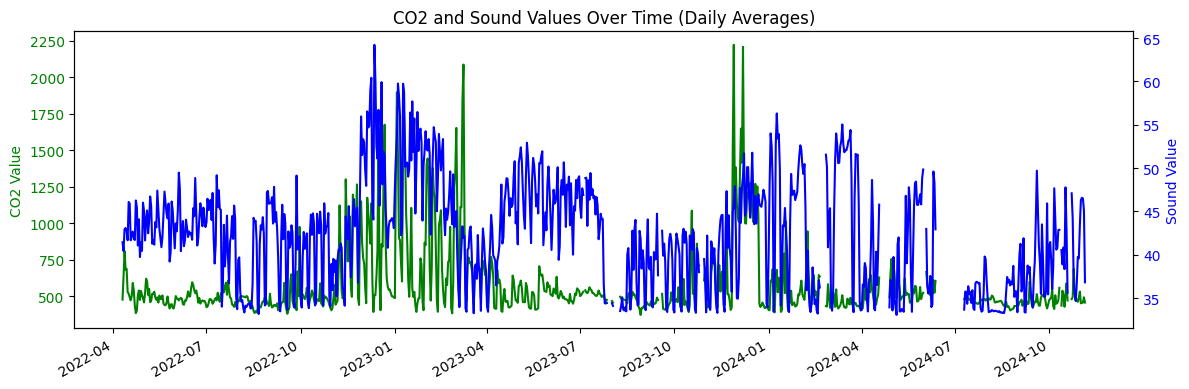

In [ ]:


#Step 3
sensor_data = data

# Resample data to daily averages to smooth fluctuations for clearer trends
hourly_data = sensor_data.set_index('time').resample('D').mean()

# Create figure and axis objects with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot CO2 data on the primary y-axis
ax1.plot(hourly_data.index, hourly_data['co2_value'], color='green', label='CO2 Value')
ax1.set_ylabel('CO2 Value', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create secondary y-axis for sound data
ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
ax2.set_ylabel('Sound Value', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Format x-axis for dates
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
fig.autofmt_xdate()

# Title and layout adjustments
plt.title('CO2 and Sound Values Over Time (Daily Averages)')
fig.tight_layout()

plt.show()


### Visualizing correlation matrix with original values

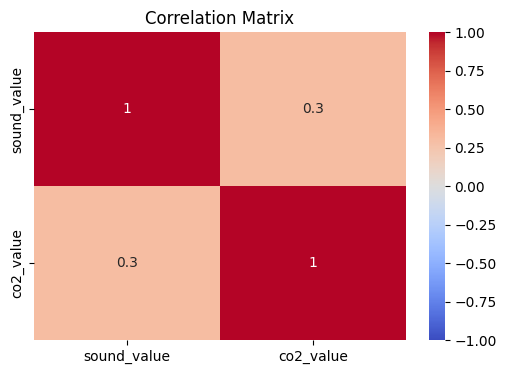

Correlation between sound_value and co2_value: 0.3003888379125694


In [6]:
# Step 4: Visualize correlation matrix using heatmap
plt.figure(figsize=(6, 4))
correlation_matrix = data[['sound_value', 'co2_value']].corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Step 5: Calculate the correlation between 'sound_value' and 'co2_value'
correlation = data['sound_value'].corr(data['co2_value'])
print(f"Correlation between sound_value and co2_value: {correlation}")

The correlation coefficient between sound_value and co2_value is approximately 0.302. Correlation coefficients range from -1 to 1, and here's how to interpret this specific value:

Magnitude (0.302):

1. The value is close to 0, indicating a weak positive correlation. This means that as sound_value increases, co2_value tends to increase slightly, but the relationship is not very strong. The increase in one variable doesn't lead to a very consistent or predictable increase in the other.
Direction (Positive):

2. Since the value is positive, the relationship between the two variables is in the same direction. In this case, higher sound levels tend to be associated with higher CO₂ levels, albeit weakly. Conversely, lower sound values are loosely related to lower CO₂ levels.

# Shifting Co2 values to see the best shift interval between 10, 20 and 30 mins

In [23]:
import pandas as pd

# Load data
df = pd.read_csv('Cleaned_sound_db/inverted_cleaned_file.csv')

# Define the maximum shift and the interval (10-minute increments)
max_shift_minutes = 60
interval = 10

# Loop through each interval and shift the data
for shift_minutes in range(interval, max_shift_minutes + 1, interval):
    shift_rows = shift_minutes // interval  # Calculate the number of rows to shift
    shifted_df = df.copy()
    shifted_df['co2_value'] = df['co2_value'].shift(-shift_rows)

    # Drop rows with NaN values generated from the shift
    shifted_df = shifted_df.dropna(subset=['co2_value']).reset_index(drop=True)

    # Save the shifted data to CSV
    output_filename = f'Cleaned_sound_db/shifted_co2_{shift_minutes}_min.csv'
    shifted_df.to_csv(output_filename, index=False)

    print(f"Shifted data for {shift_minutes} minutes saved to {output_filename}")


Shifted data for 10 minutes saved to Cleaned_sound_db/shifted_co2_10_min.csv
Shifted data for 20 minutes saved to Cleaned_sound_db/shifted_co2_20_min.csv
Shifted data for 30 minutes saved to Cleaned_sound_db/shifted_co2_30_min.csv
Shifted data for 40 minutes saved to Cleaned_sound_db/shifted_co2_40_min.csv
Shifted data for 50 minutes saved to Cleaned_sound_db/shifted_co2_50_min.csv
Shifted data for 60 minutes saved to Cleaned_sound_db/shifted_co2_60_min.csv


## Plotting graphs

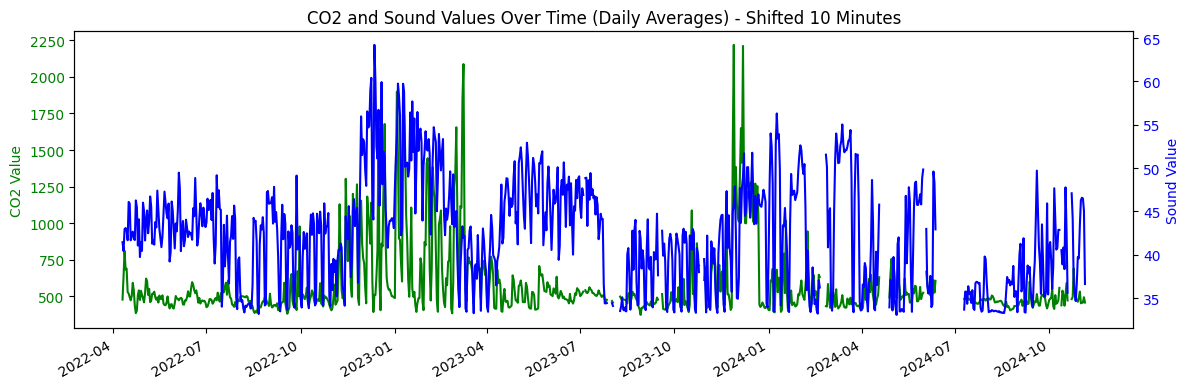

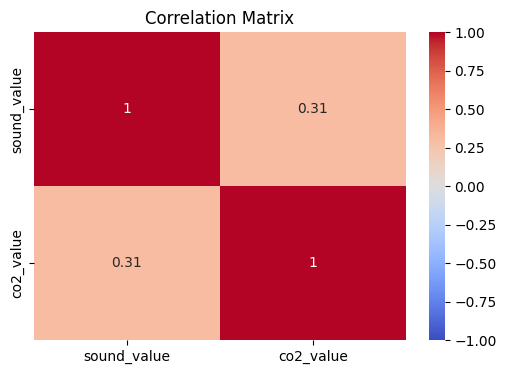

Correlation between sound_value and co2_value: 0.3081647325502553


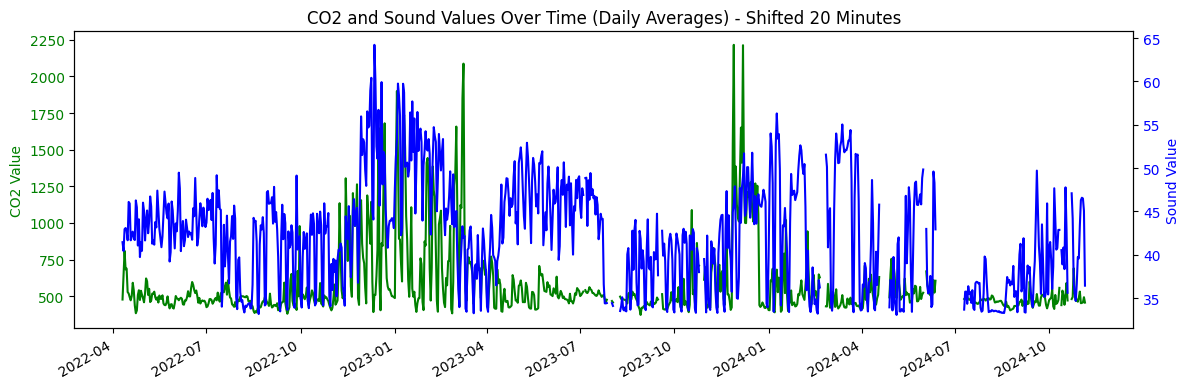

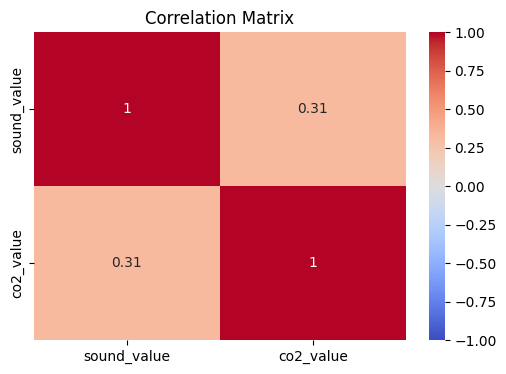

Correlation between sound_value and co2_value: 0.3137631108133793


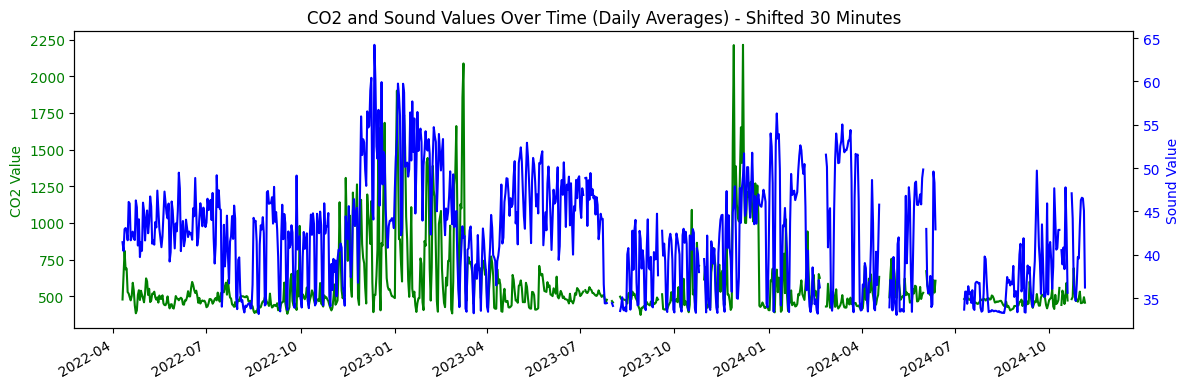

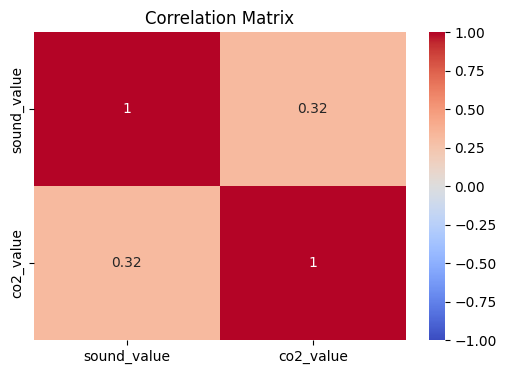

Correlation between sound_value and co2_value: 0.31805860772900846


In [9]:
# List of CSV files for shifted data
csv_files = ["shifted_co2_10_min.csv", "shifted_co2_20_min.csv", "shifted_co2_30_min.csv"]

for file in csv_files:
    # Load the dataset
    sensor_data = pd.read_csv("Cleaned_sound_db/"+file)
    
    # Ensure the 'time' column is in datetime format
    sensor_data['time'] = pd.to_datetime(sensor_data['time'])
    
    # Set the 'time' column as the index for resampling
    daily_data = sensor_data.set_index('time').resample('D').mean()

    # Create figure and axis objects with two y-axes
    fig, ax1 = plt.subplots(figsize=(12, 4))

    # Plot CO2 data on the primary y-axis
    ax1.plot(daily_data.index, daily_data['co2_value'], color='green', label='CO2 Value')
    ax1.set_ylabel('CO2 Value', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create secondary y-axis for sound data
    ax2 = ax1.twinx()
    ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
    ax2.set_ylabel('Sound Value', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Format x-axis for dates
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    fig.autofmt_xdate()

    # Title and layout adjustments
    plt.title(f'CO2 and Sound Values Over Time (Daily Averages) - Shifted {file.split("_")[-2]} Minutes')
    fig.tight_layout()

    # Show the plot
    plt.show()

    plt.figure(figsize=(6, 4))
    correlation_matrix = sensor_data[['sound_value', 'co2_value']].corr()


    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

    correlation = sensor_data['sound_value'].corr(sensor_data['co2_value'])
    print(f"Correlation between sound_value and co2_value: {correlation}")


literature study with the volume of the room.

# ***Study on Co2 and No of people in a space***

## CO₂ Accumulation and Detection in a Room with Varying Occupancy

## Overview
This study examines the accumulation of CO₂ in a **30 m² room** with a **volume of 75 m³** when the number of people changes. It also calculates the time it would take for a CO₂ sensor to detect this change, assuming no ventilation.

### Key Assumptions:
- Room size: **30 m²** with a volume of **75 m³** (assuming a ceiling height of 2.5 m).
- CO₂ emission rate per person: **0.02 m³/hour** (20 liters/hour).
- CO₂ sensor detection sensitivity: **10-20 ppm**.
- Baseline CO₂ level: **400 ppm**.

## Step 1: CO₂ Production Rate
Calculate the CO₂ production rates for different numbers of occupants.

- For **3 people**:
  \[
  \text{CO₂ production} = 3 \times 0.02 \, \text{m}^3/\text{hour} = 0.06 \, \text{m}^3/\text{hour}
  \]

- For **5 people**:
  \[
  \text{CO₂ production} = 5 \times 0.02 \, \text{m}^3/\text{hour} = 0.1 \, \text{m}^3/\text{hour}
  \]

- Difference in CO₂ production (increase from 3 to 5 people):
  \[
  \Delta \text{CO₂} = 0.1 - 0.06 = 0.04 \, \text{m}^3/\text{hour}
  \]

## Step 2: Change in CO₂ Concentration
Calculate the increase in CO₂ concentration in the room due to the change in occupancy.

\[
\text{Change in ppm per hour} = \left(\frac{0.04 \, \text{m}^3}{75 \, \text{m}^3}\right) \times 1,000,000 = 533 \, \text{ppm/hour}
\]

## Step 3: Time to Detectable Change
Estimate the time required for a CO₂ sensor to detect the difference in the number of people based on its sensitivity.

- If the sensor sensitivity is **10 ppm**:
  \[
  \text{Time to detect change} = \frac{10 \, \text{ppm}}{533 \, \text{ppm/hour}} = 0.019 \, \text{hours} = 1.14 \, \text{minutes}
  \]

- If the sensor sensitivity is **20 ppm**:
  \[
  \text{Time to detect change} = \frac{20 \, \text{ppm}}{533 \, \text{ppm/hour}} = 0.038 \, \text{hours} = 2.28 \, \text{minutes}
  \]

## Conclusion
In a **30 m² room** with a volume of **75 m³**, if the number of occupants increases from **3 to 5**, the CO₂ concentration rises by **533 ppm per hour**. A typical CO₂ sensor with a detection sensitivity of **10-20 ppm** would be able to detect this change within **1-3 minutes**. 

Proper ventilation is recommended to maintain safe indoor air quality, as CO₂ levels can increase quickly with multiple occupants in an enclosed space.


# **Preparing Data for Correlation with No. of humans**

### Getting the data set required and time fixed format fixed like the nb of people data set for the ***original data*** set

In [36]:
df = pd.read_csv('Cleaned_sound_db\inverted_cleaned_file.csv', parse_dates=['time'])

df['time'] = df['time'].dt.round('10min')

# Filter the data between the specified dates
start_date = '2024-02-02'
end_date = '2024-02-21'

# Extract the relevant data
filtered_data = df[(df['time'] >= start_date) & (df['time'] <= end_date)]


# Optionally, save the filtered data to a new CSV file
filtered_data.to_csv('Cleaned_Nhuman_sound_db/0_shift_db_sound_in_range.csv', index=False)

filtered_data.head()


,time,sound_value,co2_value
88880,2024-02-02 00:00:00,51.0,466.0
88881,2024-02-02 00:10:00,50.0,469.0
88882,2024-02-02 00:20:00,52.0,463.0
88883,2024-02-02 00:30:00,51.0,486.0
88884,2024-02-02 00:40:00,51.0,480.0


### Getting the data set required and time fixed format fixed like the nb of people data set for the ***10,20 and 30 mins shift*** data sets

In [35]:

for i in range(10,61,10):
    df = pd.read_csv(f'Cleaned_sound_db\shifted_co2_{i}_min.csv', parse_dates=['time'])

    df['time'] = df['time'].dt.round('10min')

    # Filter the data between the specified dates
    start_date = '2024-02-02'
    end_date = '2024-02-21'

    # Extract the relevant data
    filtered_data = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

    # Optionally, save the filtered data to a new CSV file
    filtered_data.to_csv(f'Cleaned_Nhuman_sound_db/{i}_shift_db_sound_in_range.csv', index=False)


### Creating single file containing all the data: Nb People, sound and dB for Original, 10 mins, 20 mins and 30 mins co2 shift data sets.

In [37]:
import pandas as pd

df_people = pd.read_csv('Cleaned_Nhuman_sound_db\detections_filtered_with_timestamp.csv', parse_dates=['Timestamp'])
# Rename the timestamp columns for consistency
df_people.rename(columns={'Timestamp': 'time'}, inplace=True)

for i in range(0,61,10): 
    # Read the second file (sound and CO2 data)
    df_sensor = pd.read_csv(f'Cleaned_Nhuman_sound_db/{i}_shift_db_sound_in_range.csv', parse_dates=['time'])

    # Merge the DataFrames on the 'time' column using an inner join
    merged_df = pd.merge(df_people[['time', 'Num_people']], df_sensor[['time', 'sound_value', 'co2_value']], on='time', how='inner')

    # Save the merged data to a new CSV file
    merged_df.to_csv(f'Cleaned_Nhuman_sound_db/Final_{i}_shift_db_sound_in_range.csv', index=False)

    print(merged_df.head(3))


                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      562.0
1 2024-02-02 13:30:00           0         58.0      989.0
2 2024-02-02 14:00:00           6         62.0     1120.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      615.0
1 2024-02-02 13:30:00           0         58.0     1042.0
2 2024-02-02 14:00:00           6         62.0     1155.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      775.0
1 2024-02-02 13:30:00           0         58.0     1113.0
2 2024-02-02 14:00:00           6         62.0     1164.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      989.0
1 2024-02-02 13:30:00           0         58.0     1120.0
2 2024-02-02 14:00:00           6         62.0     1288.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 1

### Plotting for Analysis


---------Processing file with 0 mins shift---------

Correlation between Num_people and co2_value: 0.55
Correlation between Num_people and sound_value: 0.37
Correlation between sound_value and co2_value: 0.23


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\105630725.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30T').mean()


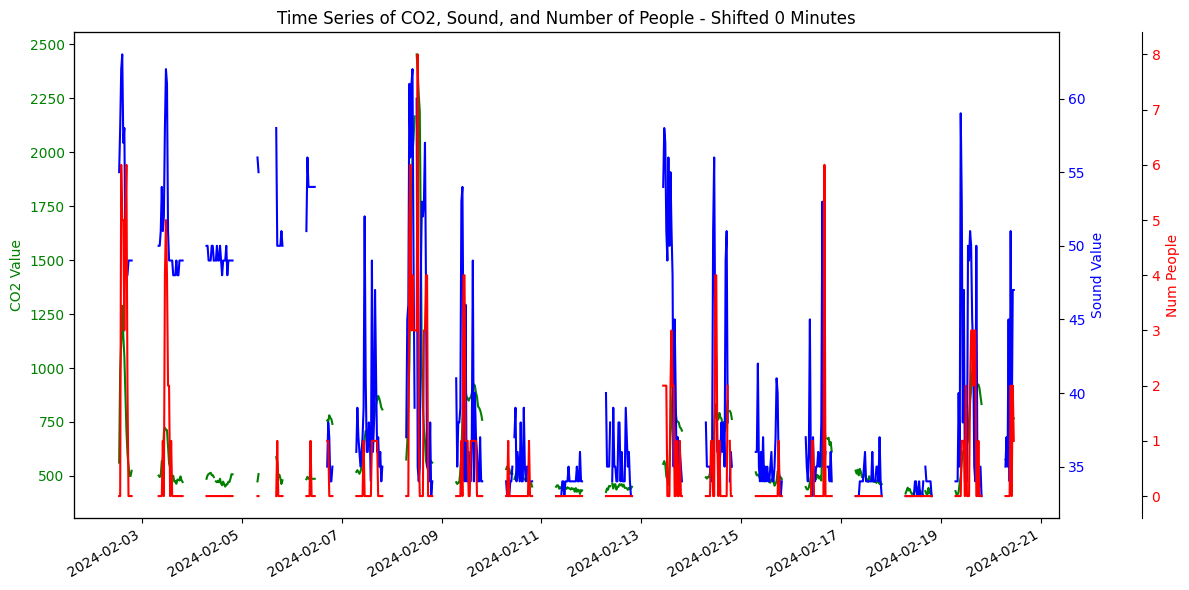

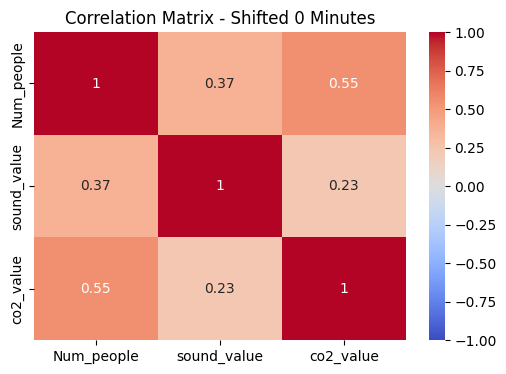


---------Processing file with 10 mins shift---------

Correlation between Num_people and co2_value: 0.55
Correlation between Num_people and sound_value: 0.37
Correlation between sound_value and co2_value: 0.24


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\105630725.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30T').mean()


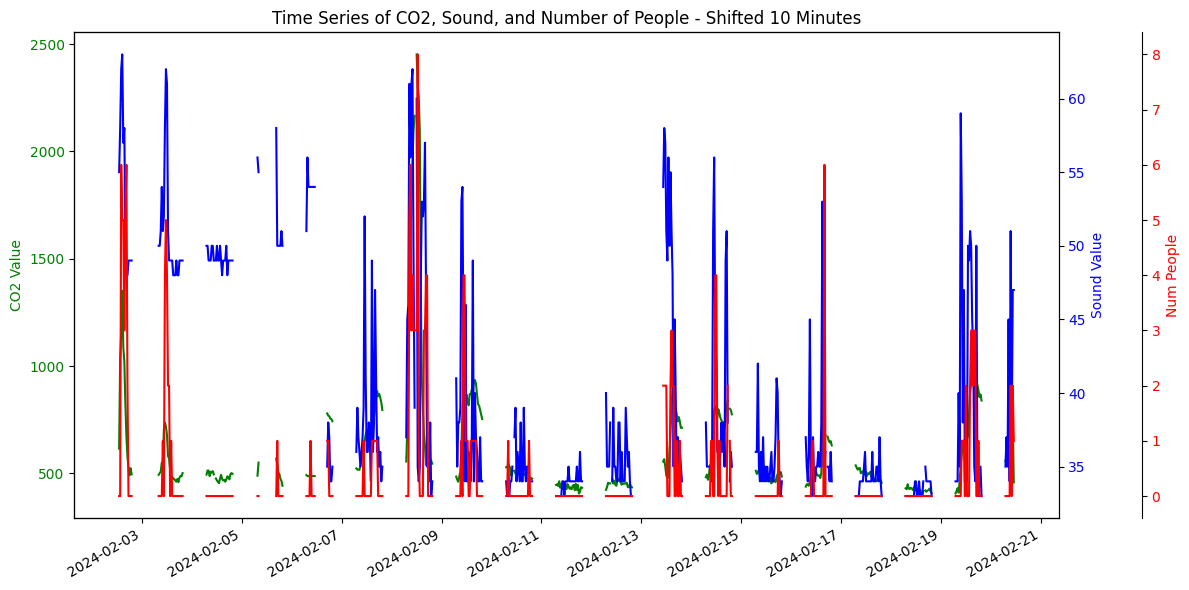

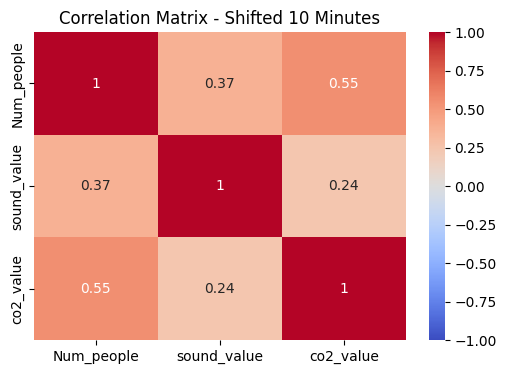


---------Processing file with 20 mins shift---------

Correlation between Num_people and co2_value: 0.56
Correlation between Num_people and sound_value: 0.37
Correlation between sound_value and co2_value: 0.26


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\105630725.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30T').mean()


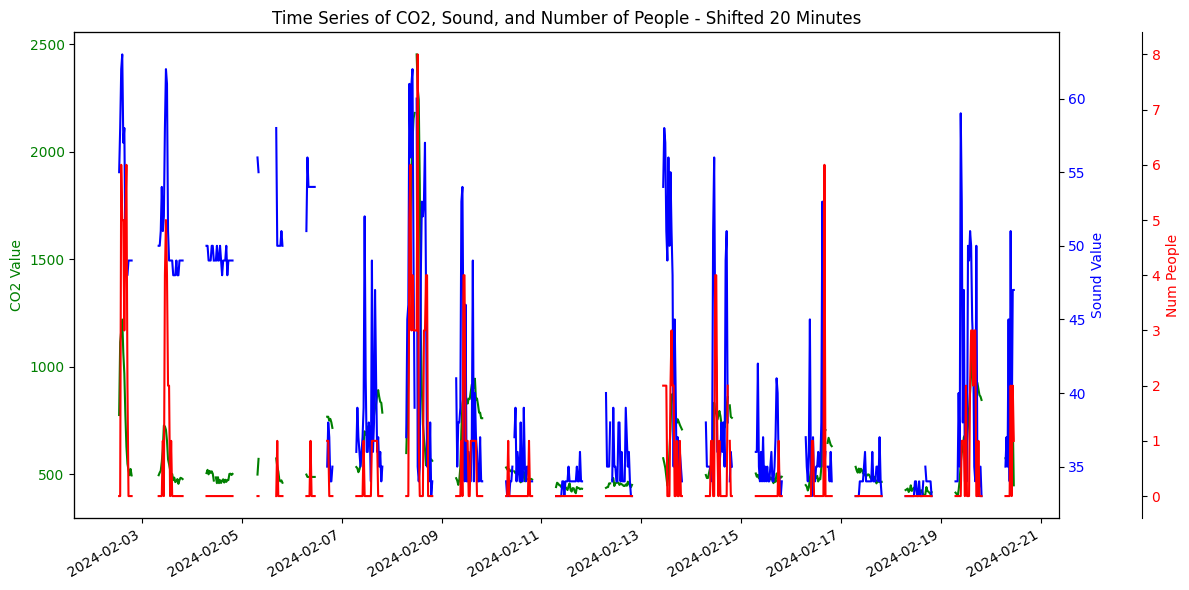

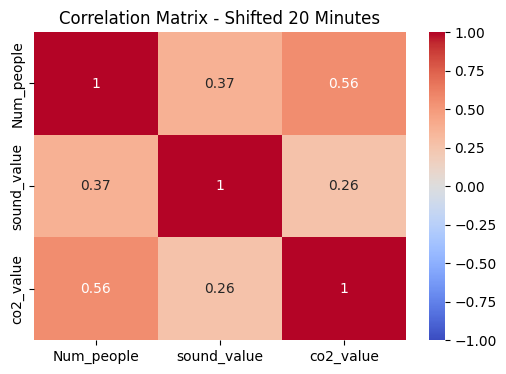


---------Processing file with 30 mins shift---------

Correlation between Num_people and co2_value: 0.56
Correlation between Num_people and sound_value: 0.37
Correlation between sound_value and co2_value: 0.28


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\105630725.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30T').mean()


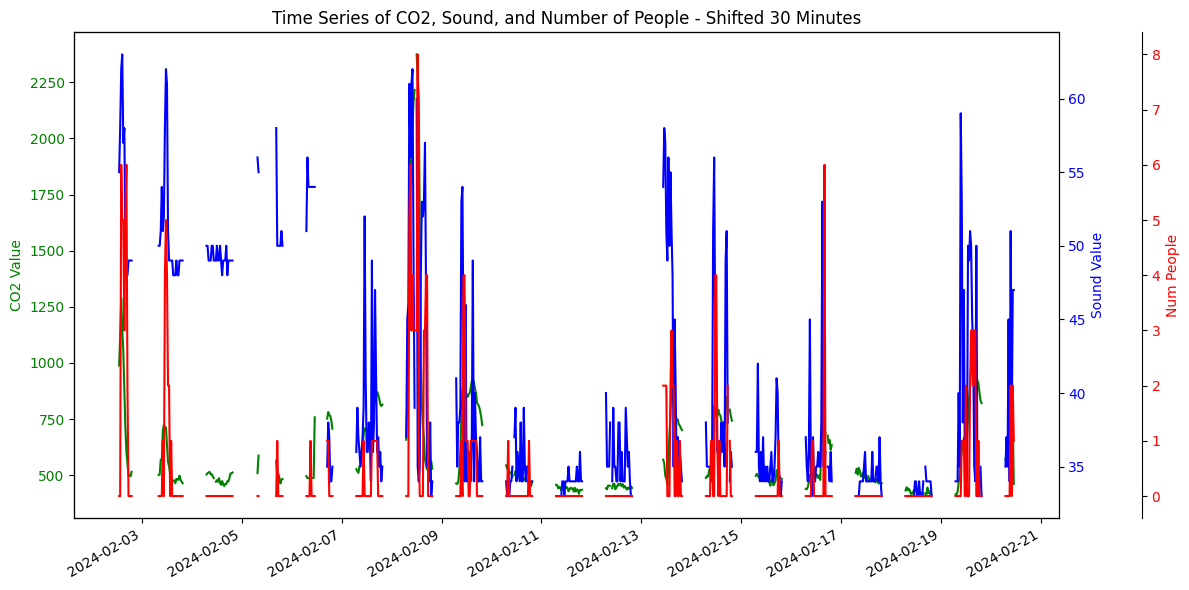

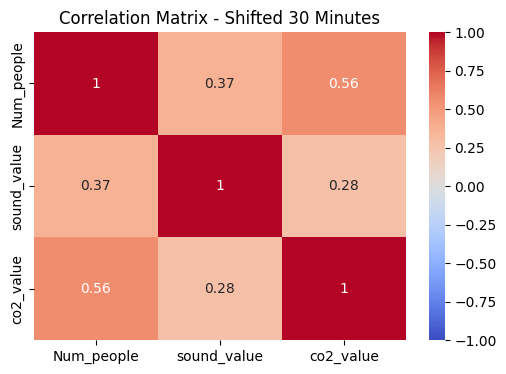


---------Processing file with 40 mins shift---------

Correlation between Num_people and co2_value: 0.55
Correlation between Num_people and sound_value: 0.37
Correlation between sound_value and co2_value: 0.28


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\105630725.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30T').mean()


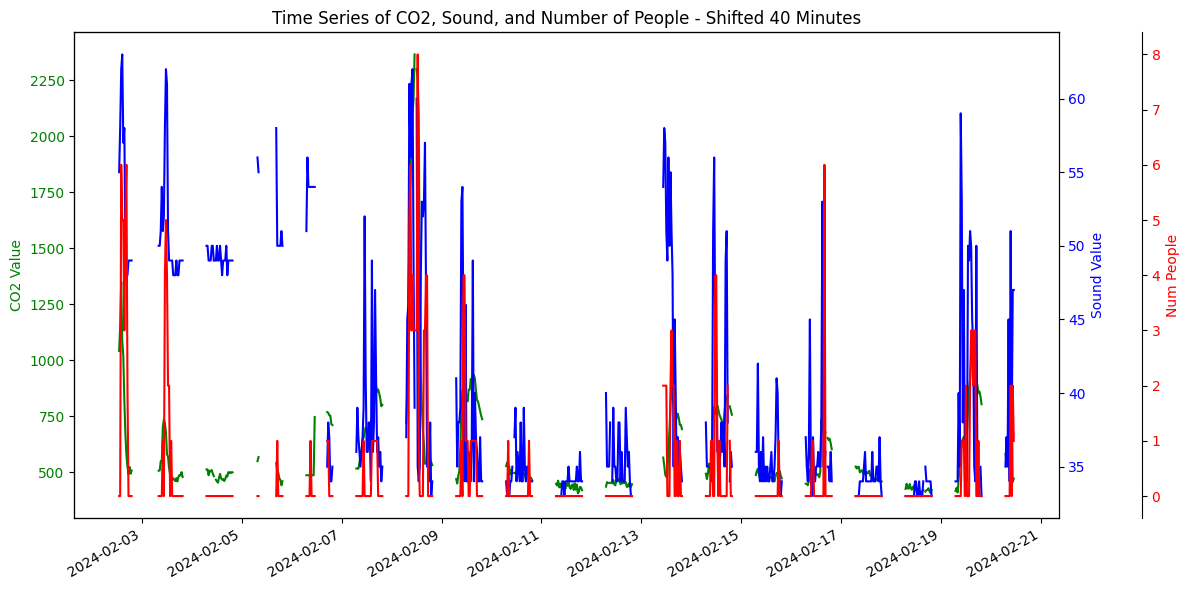

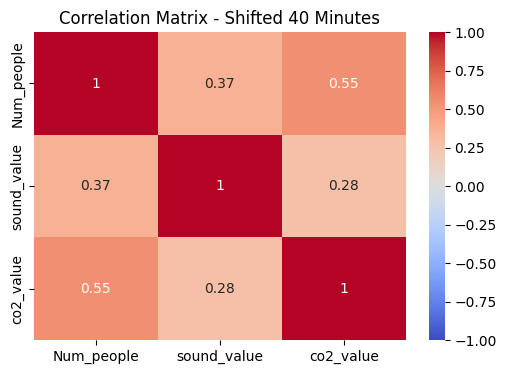


---------Processing file with 50 mins shift---------

Correlation between Num_people and co2_value: 0.55
Correlation between Num_people and sound_value: 0.37
Correlation between sound_value and co2_value: 0.28


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\105630725.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30T').mean()


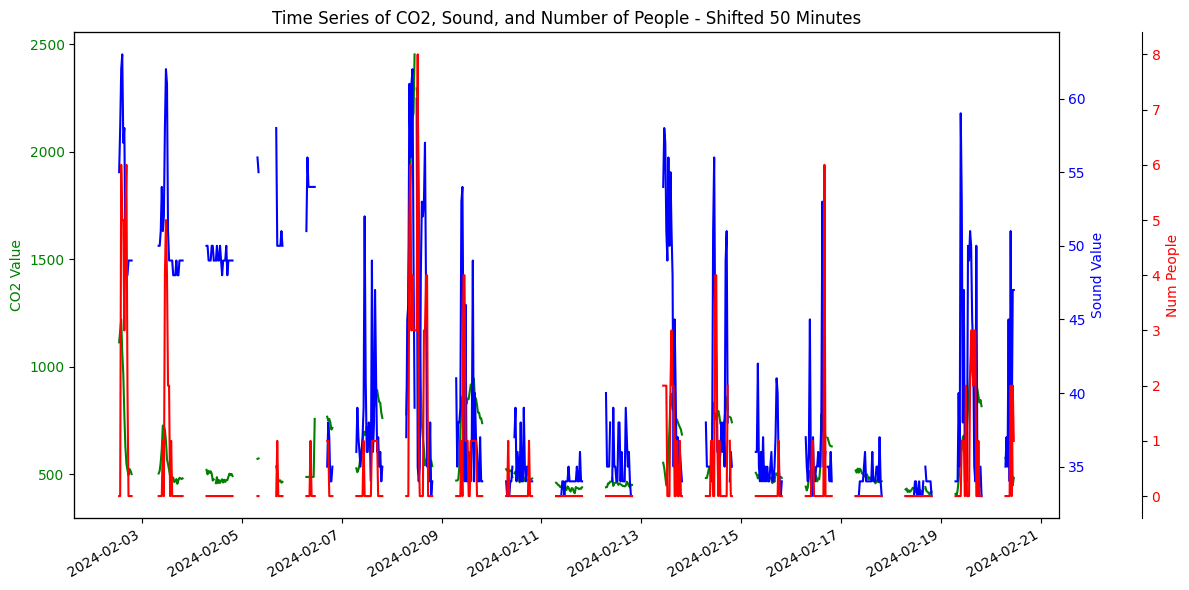

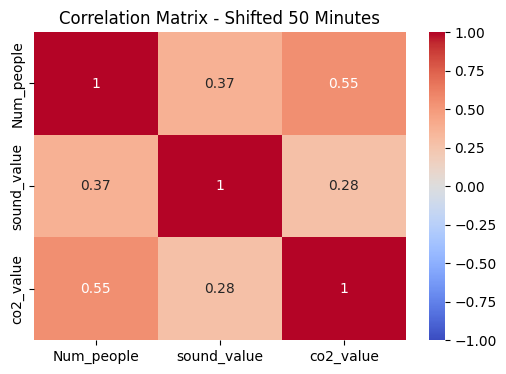


---------Processing file with 60 mins shift---------

Correlation between Num_people and co2_value: 0.54
Correlation between Num_people and sound_value: 0.37
Correlation between sound_value and co2_value: 0.29


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\105630725.py:20: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30T').mean()


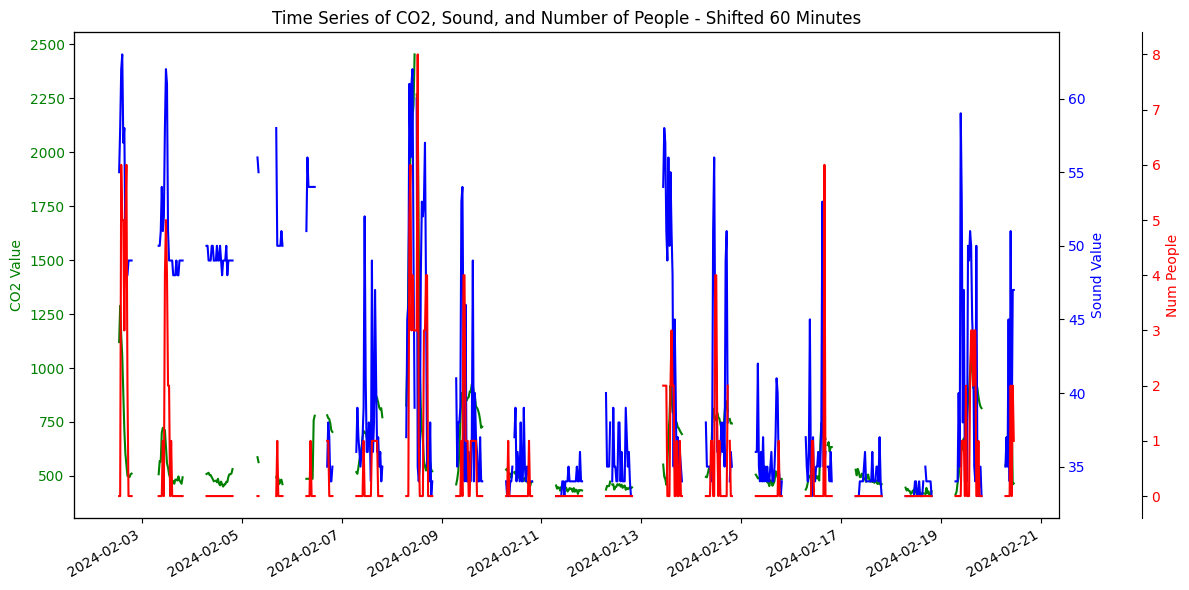

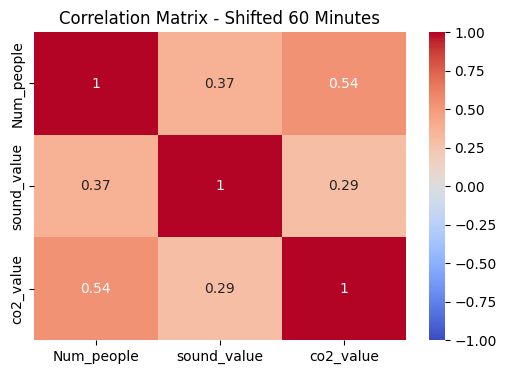

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.graph_objects as go


# Iterate over each file
for i in range(0,61,10): 

    print(f"\n---------Processing file with {i} mins shift---------\n")
    
    # Load the dataset
    sensor_data = pd.read_csv(f"Cleaned_Nhuman_sound_db/Final_{i}_shift_db_sound_in_range.csv")

    # Ensure the 'time' column is in datetime format
    sensor_data['time'] = pd.to_datetime(sensor_data['time'])

    # Set the 'time' column as the index for resampling (daily mean)
    daily_data = sensor_data.set_index('time').resample('30T').mean()

    # Calculate correlations
    correlation_matrix = daily_data[['Num_people', 'sound_value', 'co2_value']].corr()
    correlation_people_co2 = daily_data['Num_people'].corr(daily_data['co2_value'])
    correlation_people_sound = daily_data['Num_people'].corr(daily_data['sound_value'])
    correlation_sound_co2 = daily_data['sound_value'].corr(daily_data['co2_value'])

    # Print correlation values
    print(f"Correlation between Num_people and co2_value: {correlation_people_co2:.2f}")
    print(f"Correlation between Num_people and sound_value: {correlation_people_sound:.2f}")
    print(f"Correlation between sound_value and co2_value: {correlation_sound_co2:.2f}")

    # Plot Time Series for Num_people, sound_value, and co2_value
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot CO2 on primary y-axis
    ax1.plot(daily_data.index, daily_data['co2_value'], color='green', label='CO2 Value')
    ax1.set_ylabel('CO2 Value', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create secondary y-axis for sound_value
    ax2 = ax1.twinx()
    ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
    ax2.set_ylabel('Sound Value', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for Num_people
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(daily_data.index, daily_data['Num_people'], color='red', label='Num People')
    ax3.set_ylabel('Num People', color='red')
    ax3.tick_params(axis='y', labelcolor='red')

    # Formatting the x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=2))
    fig.autofmt_xdate()

    # Title and layout
    plt.title(f'Time Series of CO2, Sound, and Number of People - Shifted {i} Minutes')
    fig.tight_layout()

    # Show the plot
    plt.show()

    # Heatmap of the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - Shifted {i} Minutes')
    plt.show()



## **Correlation with ground truth of NB of People**

### Data Preparation

In [3]:
import pandas as pd

df_people = pd.read_csv('Ground Truth For sumHumans/GROUND_TRUTH_with_timestamp.csv', parse_dates=['time'])

for i in range(0,31,10): 
    # Read the second file (sound and CO2 data)
    df_sensor = pd.read_csv(f'Cleaned_Nhuman_sound_db/{i}_shift_db_sound_in_range.csv', parse_dates=['time'])

    # Merge the DataFrames on the 'time' column using an inner join
    merged_df = pd.merge(df_people[['time', 'Num_people']], df_sensor[['time', 'sound_value', 'co2_value']], on='time', how='inner')

    # Save the merged data to a new CSV file
    merged_df.to_csv(f'Ground Truth For sumHumans/Final_{i}_shift_Ground Truth nb_db_co2.csv', index=False)

    print(merged_df.head(3))




                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      562.0
1 2024-02-02 13:30:00           0         58.0      989.0
2 2024-02-02 14:00:00           7         62.0     1120.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      615.0
1 2024-02-02 13:30:00           0         58.0     1042.0
2 2024-02-02 14:00:00           7         62.0     1155.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      775.0
1 2024-02-02 13:30:00           0         58.0     1113.0
2 2024-02-02 14:00:00           7         62.0     1164.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      989.0
1 2024-02-02 13:30:00           0         58.0     1120.0
2 2024-02-02 14:00:00           7         62.0     1288.0


### Analysis


---------Processing file with 0 mins shift---------

Correlation between Num_people and co2_value: 0.87
Correlation between Num_people and sound_value: 0.59
Correlation between sound_value and co2_value: 0.68


C:\Users\dewmi\AppData\Local\Temp\ipykernel_15220\935526206.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


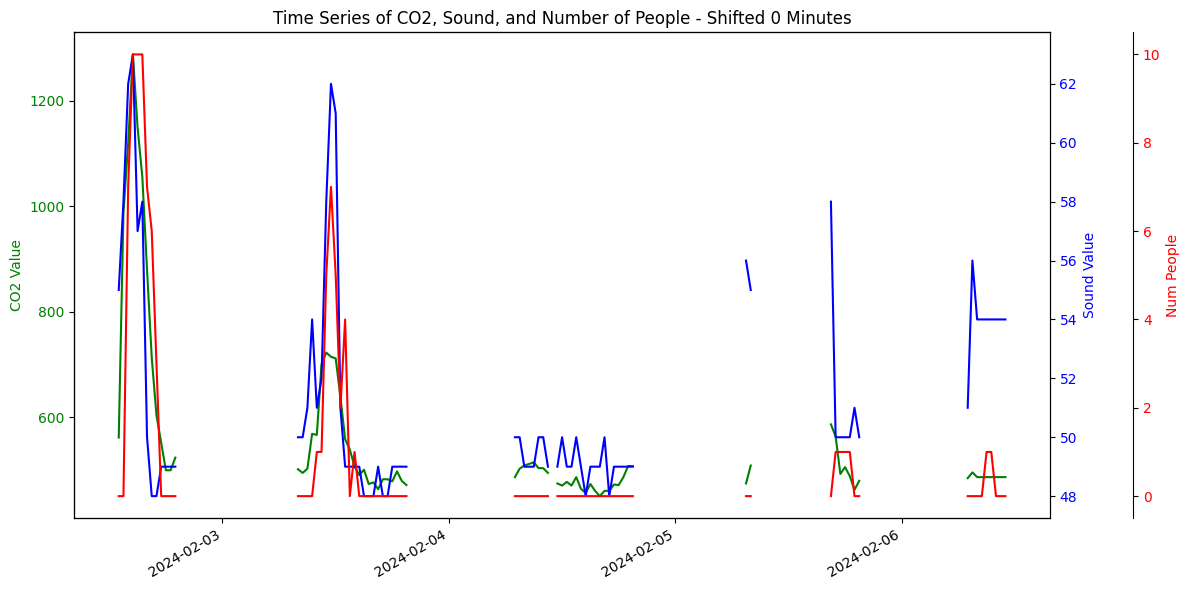

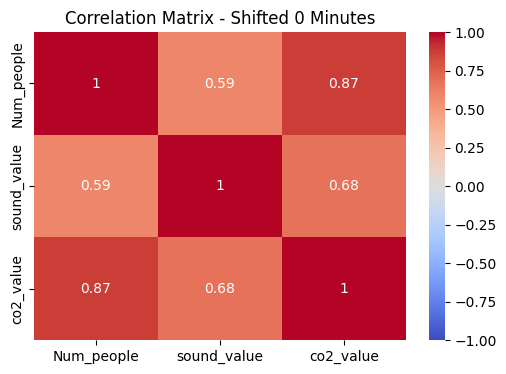


---------Processing file with 10 mins shift---------

Correlation between Num_people and co2_value: 0.84
Correlation between Num_people and sound_value: 0.59
Correlation between sound_value and co2_value: 0.70


C:\Users\dewmi\AppData\Local\Temp\ipykernel_15220\935526206.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


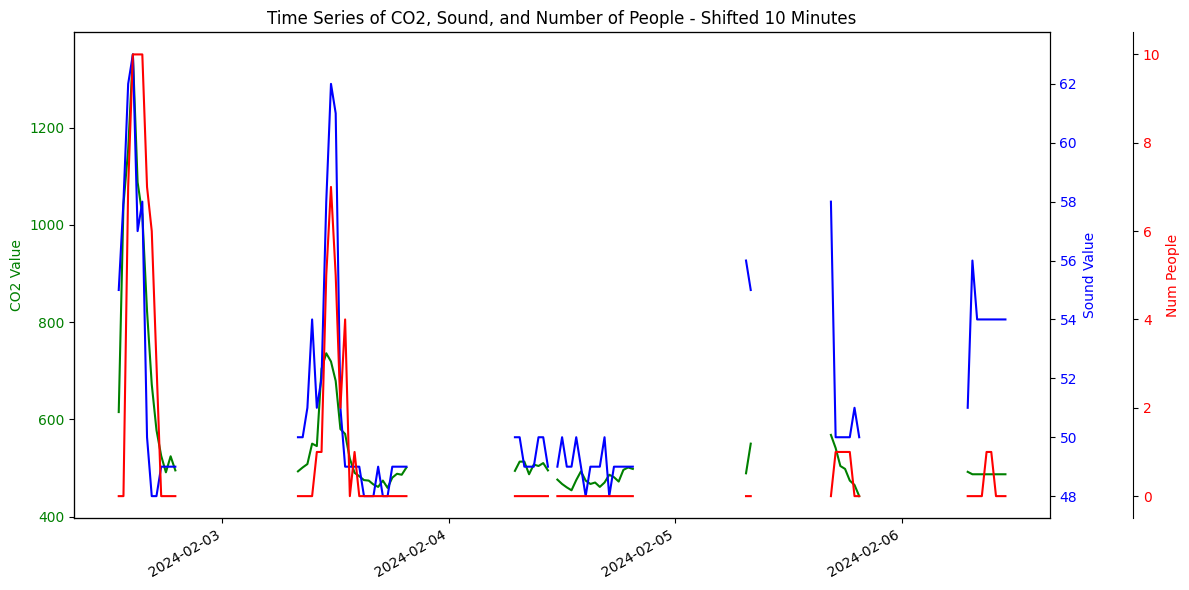

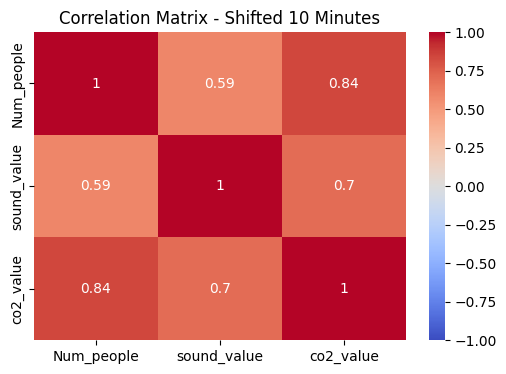


---------Processing file with 20 mins shift---------

Correlation between Num_people and co2_value: 0.78
Correlation between Num_people and sound_value: 0.59
Correlation between sound_value and co2_value: 0.71


C:\Users\dewmi\AppData\Local\Temp\ipykernel_15220\935526206.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


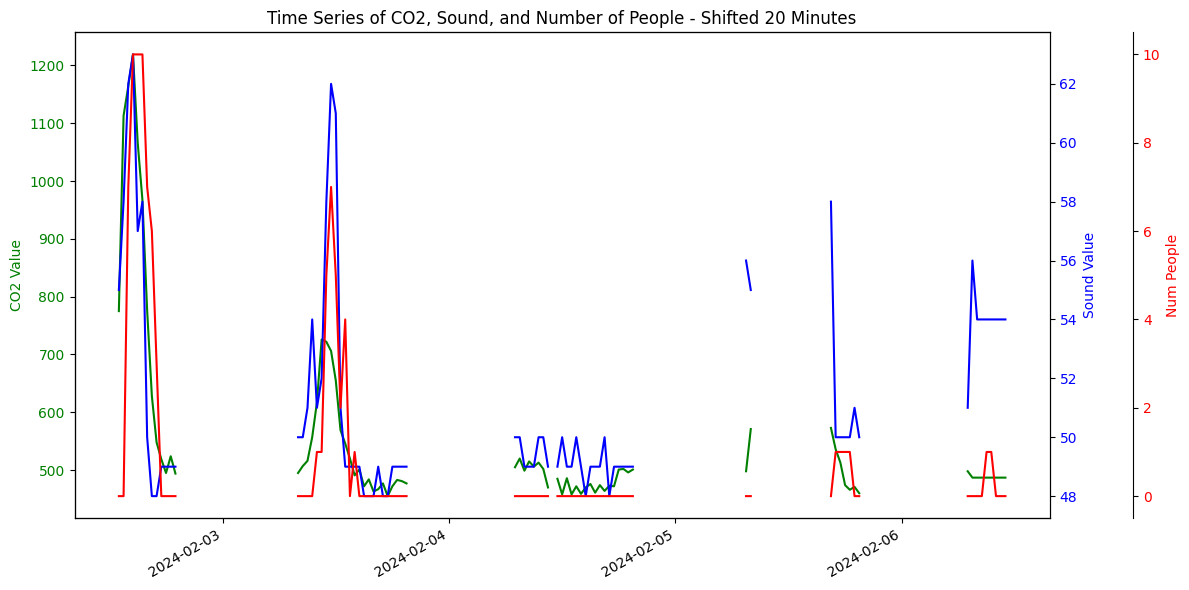

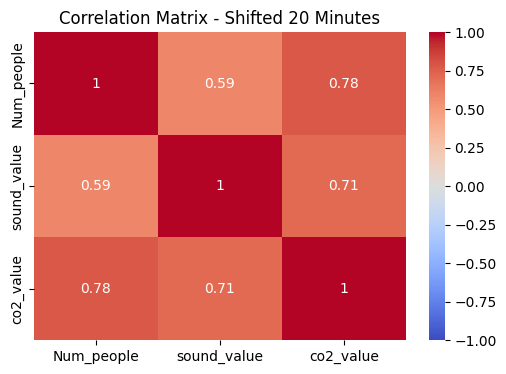


---------Processing file with 30 mins shift---------

Correlation between Num_people and co2_value: 0.69
Correlation between Num_people and sound_value: 0.59
Correlation between sound_value and co2_value: 0.72


C:\Users\dewmi\AppData\Local\Temp\ipykernel_15220\935526206.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


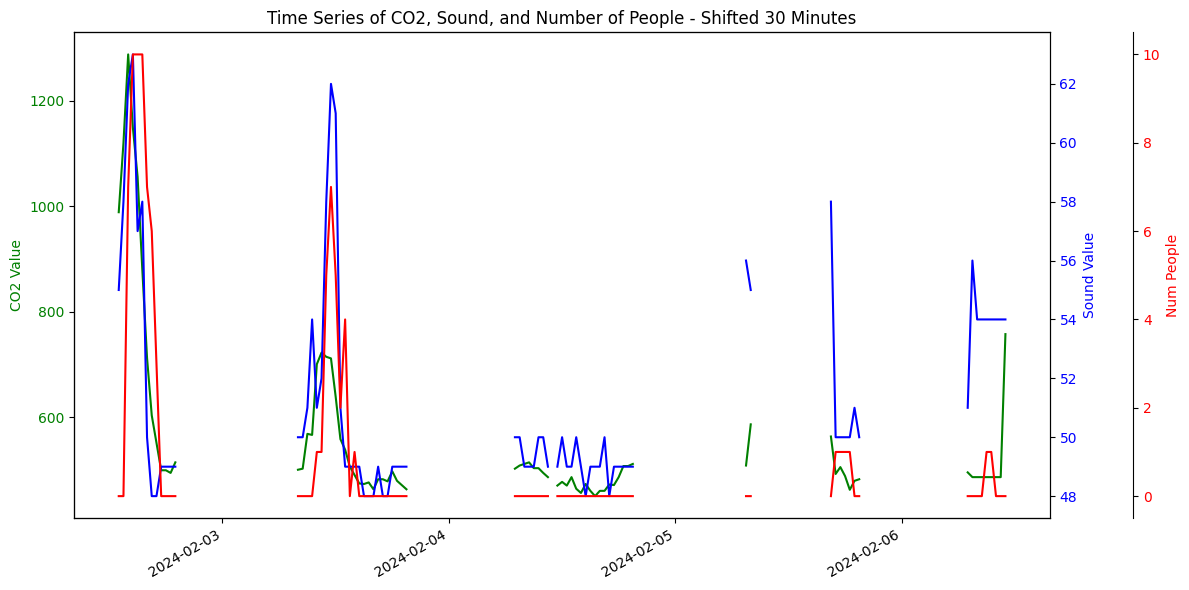

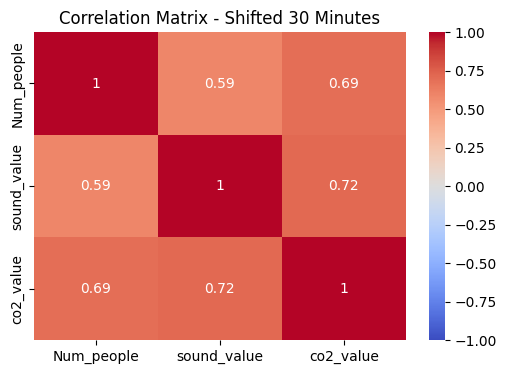

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.graph_objects as go


# Iterate over each file
for i in range(0,31,10): 

    print(f"\n---------Processing file with {i} mins shift---------\n")
    
    # Load the dataset
    sensor_data = pd.read_csv(f"Ground Truth For sumHumans/Final_{i}_shift_Ground Truth nb_db_co2.csv")

    # Ensure the 'time' column is in datetime format
    sensor_data['time'] = pd.to_datetime(sensor_data['time'])

    # Set the 'time' column as the index for resampling (daily mean)
    daily_data = sensor_data.set_index('time').resample('30t').mean()

    # Calculate correlations
    correlation_matrix = daily_data[['Num_people', 'sound_value', 'co2_value']].corr()
    correlation_people_co2 = daily_data['Num_people'].corr(daily_data['co2_value'])
    correlation_people_sound = daily_data['Num_people'].corr(daily_data['sound_value'])
    correlation_sound_co2 = daily_data['sound_value'].corr(daily_data['co2_value'])

    # Print correlation values
    print(f"Correlation between Num_people and co2_value: {correlation_people_co2:.2f}")
    print(f"Correlation between Num_people and sound_value: {correlation_people_sound:.2f}")
    print(f"Correlation between sound_value and co2_value: {correlation_sound_co2:.2f}")

    # Plot Time Series for Num_people, sound_value, and co2_value
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot CO2 on primary y-axis
    ax1.plot(daily_data.index, daily_data['co2_value'], color='green', label='CO2 Value')
    ax1.set_ylabel('CO2 Value', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create secondary y-axis for sound_value
    ax2 = ax1.twinx()
    ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
    ax2.set_ylabel('Sound Value', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for Num_people
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(daily_data.index, daily_data['Num_people'], color='red', label='Num People')
    ax3.set_ylabel('Num People', color='red')
    ax3.tick_params(axis='y', labelcolor='red')

    # Formatting the x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
    fig.autofmt_xdate()

    # Title and layout
    plt.title(f'Time Series of CO2, Sound, and Number of People - Shifted {i} Minutes')
    fig.tight_layout()

    # Show the plot
    plt.show()

    # Heatmap of the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - Shifted {i} Minutes')
    plt.show()



## **Analysis of the same time interval of the detection with yolo V3**

### Data Preparation

In [17]:
import pandas as pd

df_people = pd.read_csv('Ground Truth For sumHumans/GROUND_TRUTH_with_timestamp.csv', parse_dates=['time'])

for i in range(0,31,10): 
    # Read the second file (sound and CO2 data)
    df_sensor = pd.read_csv(f'Cleaned_Nhuman_sound_db/Final_{i}_shift_db_sound_in_range.csv', parse_dates=['time'])

    # Merge the DataFrames on the 'time' column using an inner join
    merged_df = pd.merge(df_people[['time']], df_sensor[['time', 'Num_people','sound_value', 'co2_value']], on='time', how='inner')

    # Save the merged data to a new CSV file
    merged_df.to_csv(f'Ground Truth For sumHumans/Yolov3 detection same interval/Final_{i}_shift_Yolo v3 detection nb_db_co2.csv', index=False)

    print(merged_df.head(3))


                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      562.0
1 2024-02-02 13:30:00           0         58.0      989.0
2 2024-02-02 14:00:00           6         62.0     1120.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      615.0
1 2024-02-02 13:30:00           0         58.0     1042.0
2 2024-02-02 14:00:00           6         62.0     1155.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      775.0
1 2024-02-02 13:30:00           0         58.0     1113.0
2 2024-02-02 14:00:00           6         62.0     1164.0
                 time  Num_people  sound_value  co2_value
0 2024-02-02 13:00:00           0         55.0      989.0
1 2024-02-02 13:30:00           0         58.0     1120.0
2 2024-02-02 14:00:00           6         62.0     1288.0


## Analysis


---------Processing file with 0 mins shift---------

Correlation between Num_people and co2_value: 0.79
Correlation between Num_people and sound_value: 0.55
Correlation between sound_value and co2_value: 0.68


C:\Users\dewmi\AppData\Local\Temp\ipykernel_15220\2822034131.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


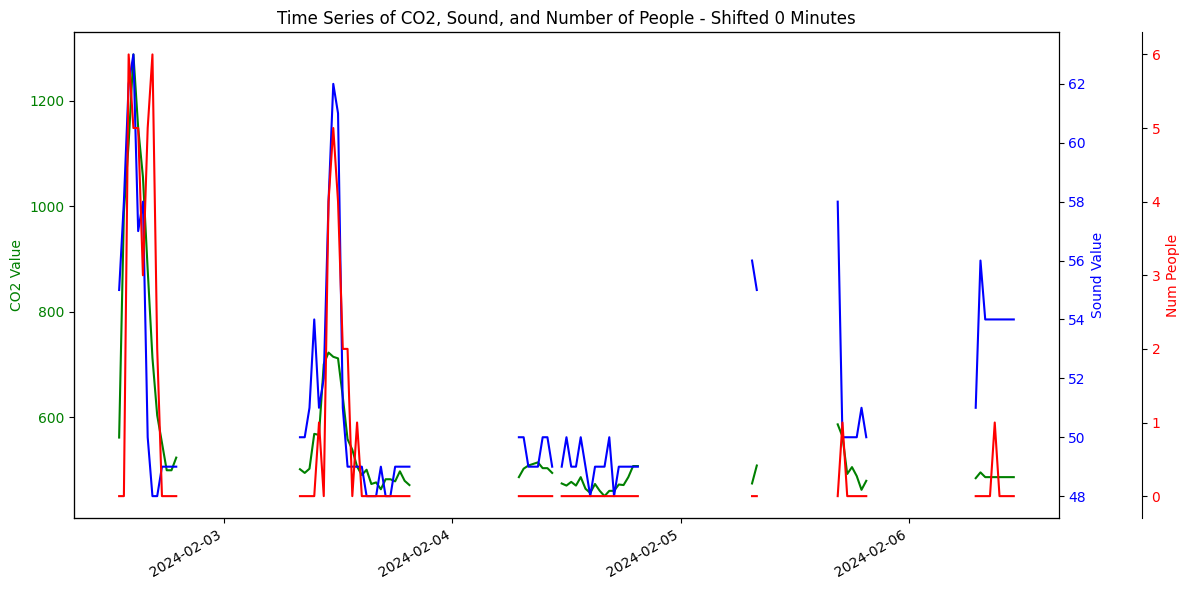

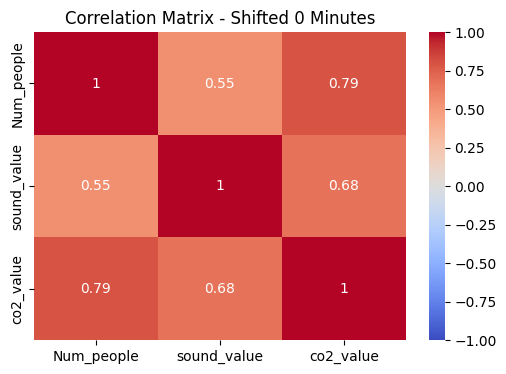


---------Processing file with 10 mins shift---------

Correlation between Num_people and co2_value: 0.76
Correlation between Num_people and sound_value: 0.55
Correlation between sound_value and co2_value: 0.70


C:\Users\dewmi\AppData\Local\Temp\ipykernel_15220\2822034131.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


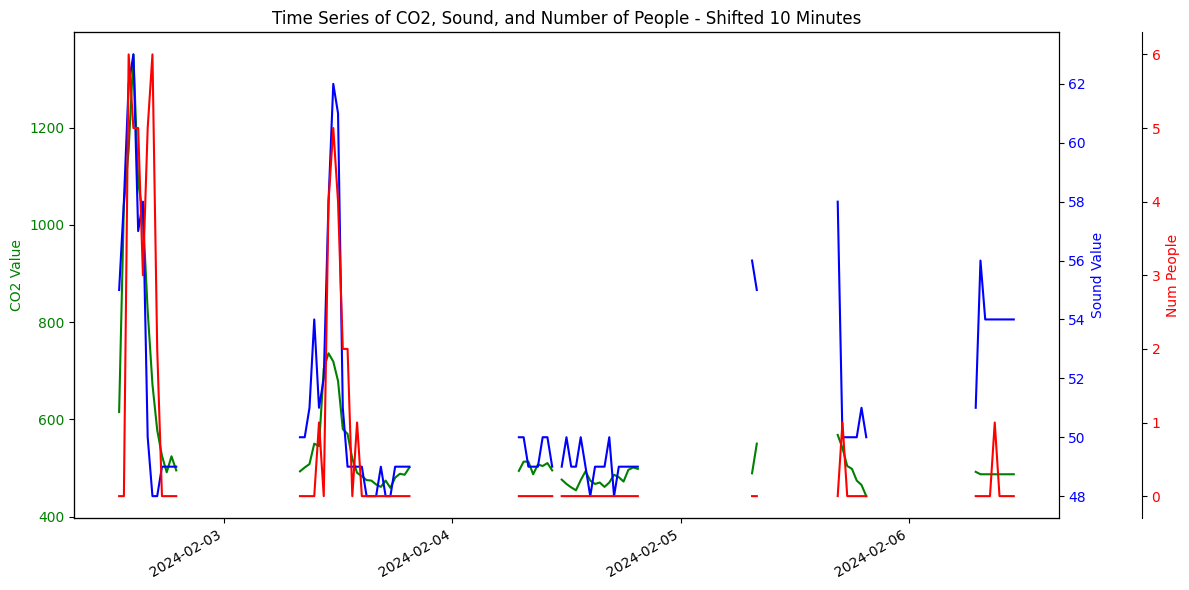

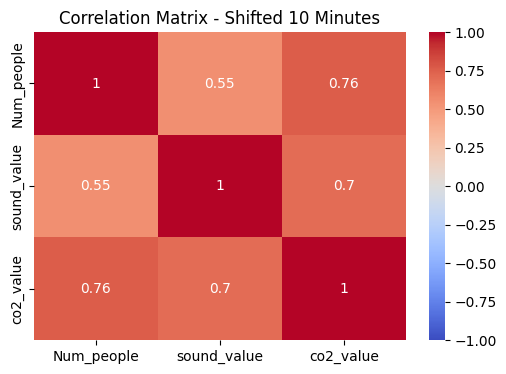


---------Processing file with 20 mins shift---------

Correlation between Num_people and co2_value: 0.71
Correlation between Num_people and sound_value: 0.55
Correlation between sound_value and co2_value: 0.71


C:\Users\dewmi\AppData\Local\Temp\ipykernel_15220\2822034131.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


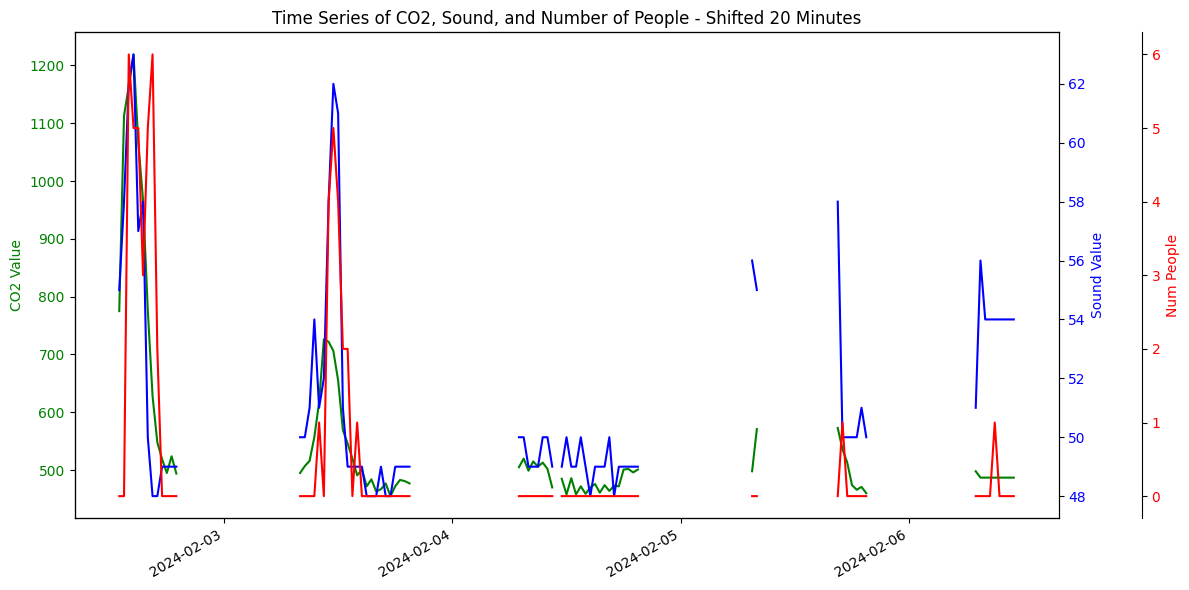

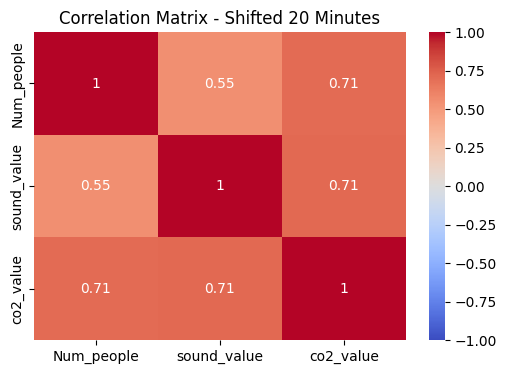


---------Processing file with 30 mins shift---------

Correlation between Num_people and co2_value: 0.65
Correlation between Num_people and sound_value: 0.55
Correlation between sound_value and co2_value: 0.72


C:\Users\dewmi\AppData\Local\Temp\ipykernel_15220\2822034131.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


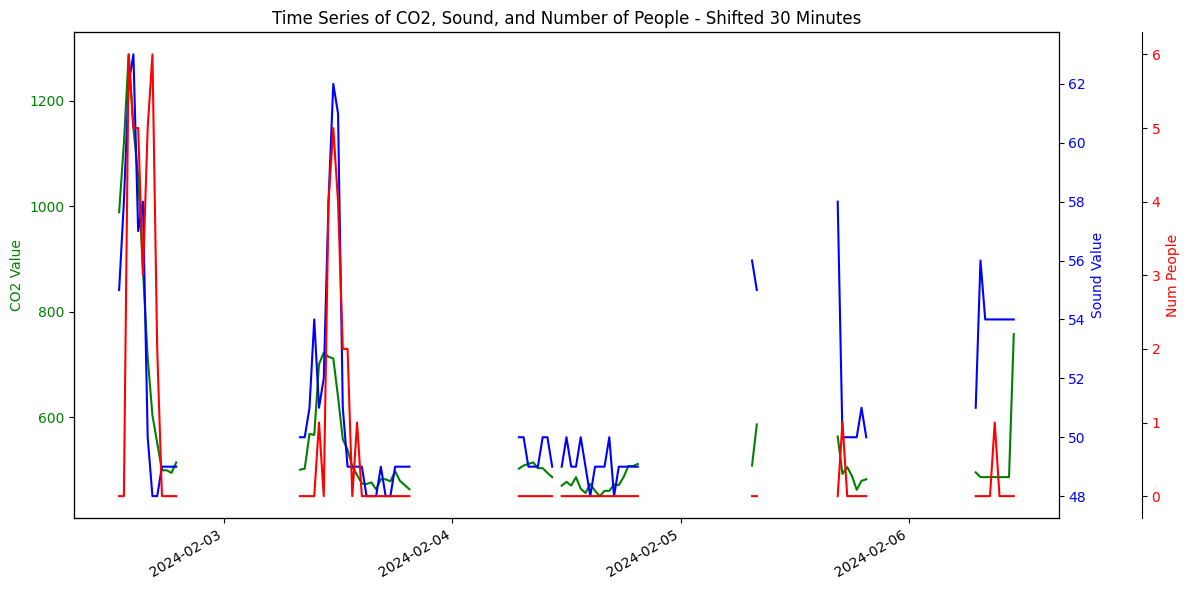

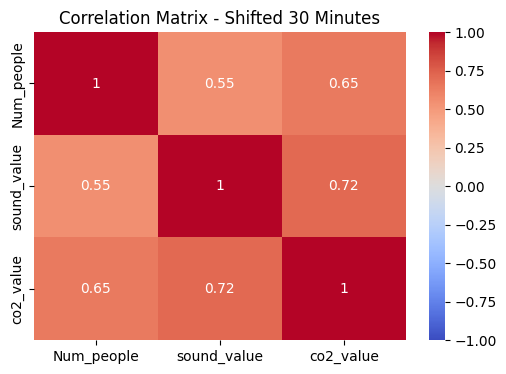

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.graph_objects as go


# Iterate over each file
for i in range(0,31,10): 

    print(f"\n---------Processing file with {i} mins shift---------\n")
    
    # Load the dataset
    sensor_data = pd.read_csv(f"Ground Truth For sumHumans/Yolov3 detection same interval/Final_{i}_shift_Yolo v3 detection nb_db_co2.csv")

    # Ensure the 'time' column is in datetime format
    sensor_data['time'] = pd.to_datetime(sensor_data['time'])

    # Set the 'time' column as the index for resampling (daily mean)
    daily_data = sensor_data.set_index('time').resample('30t').mean()

    # Calculate correlations
    correlation_matrix = daily_data[['Num_people', 'sound_value', 'co2_value']].corr()
    correlation_people_co2 = daily_data['Num_people'].corr(daily_data['co2_value'])
    correlation_people_sound = daily_data['Num_people'].corr(daily_data['sound_value'])
    correlation_sound_co2 = daily_data['sound_value'].corr(daily_data['co2_value'])

    # Print correlation values
    print(f"Correlation between Num_people and co2_value: {correlation_people_co2:.2f}")
    print(f"Correlation between Num_people and sound_value: {correlation_people_sound:.2f}")
    print(f"Correlation between sound_value and co2_value: {correlation_sound_co2:.2f}")

    # Plot Time Series for Num_people, sound_value, and co2_value
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot CO2 on primary y-axis
    ax1.plot(daily_data.index, daily_data['co2_value'], color='green', label='CO2 Value')
    ax1.set_ylabel('CO2 Value', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create secondary y-axis for sound_value
    ax2 = ax1.twinx()
    ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
    ax2.set_ylabel('Sound Value', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for Num_people
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(daily_data.index, daily_data['Num_people'], color='red', label='Num People')
    ax3.set_ylabel('Num People', color='red')
    ax3.tick_params(axis='y', labelcolor='red')

    # Formatting the x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
    fig.autofmt_xdate()

    # Title and layout
    plt.title(f'Time Series of CO2, Sound, and Number of People - Shifted {i} Minutes')
    fig.tight_layout()

    # Show the plot
    plt.show()

    # Heatmap of the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - Shifted {i} Minutes')
    plt.show()



## Graph of ground truth vs Yolo v3 detection results

Mean Absolute Error (MAE): 0.4
Mean Percentage Error: 41.18%


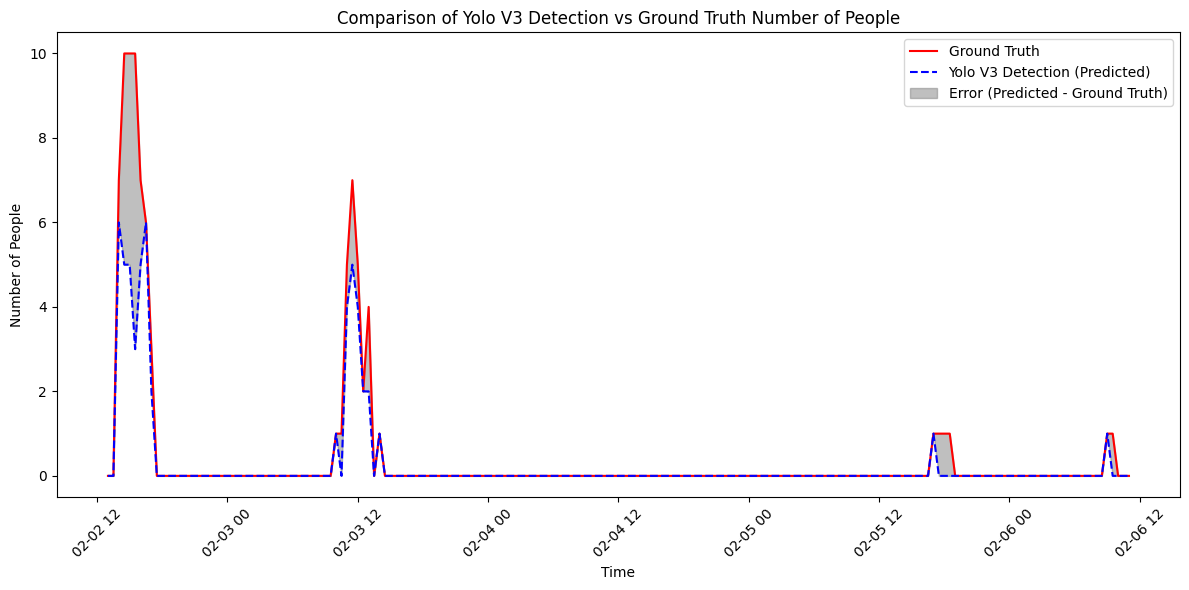

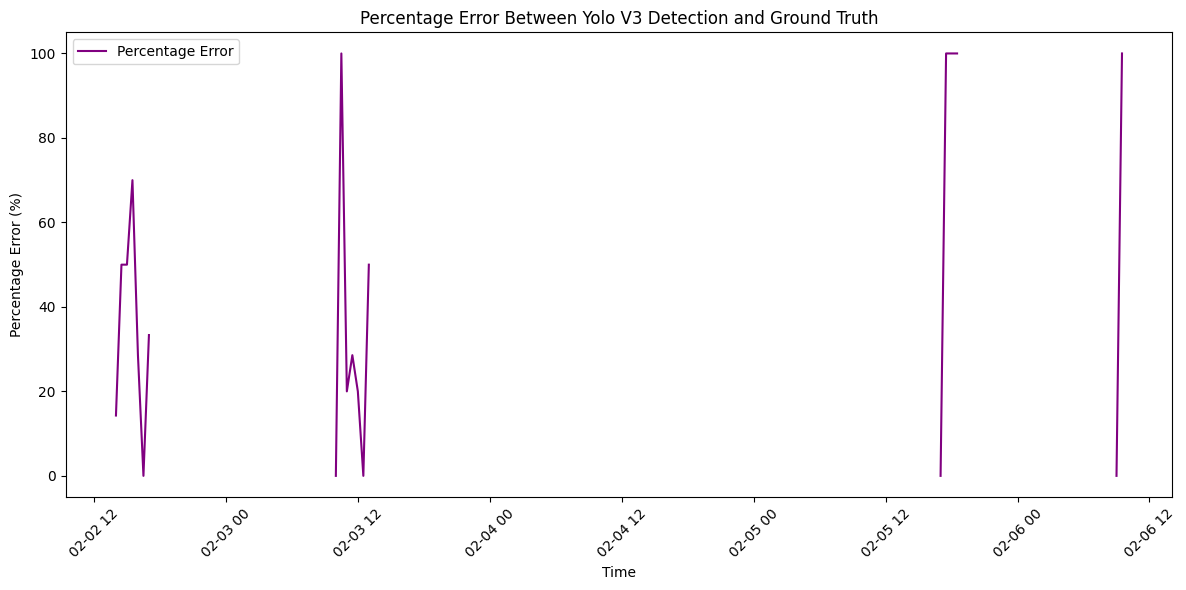

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
file1 = r'S:\OneDrive - Fondation EPF\Uni\5eme Année\Project(Σ.humans)\Coding\sum_humans\Data_Extraction and analysis\Data Analysis\Ground Truth For sumHumans\Yolov3 detection same interval\Final_0_shift_Yolo v3 detection nb_db_co2.csv'
file2 = r'S:\OneDrive - Fondation EPF\Uni\5eme Année\Project(Σ.humans)\Coding\sum_humans\Data_Extraction and analysis\Data Analysis\Ground Truth For sumHumans\Final_0_shift_Ground Truth nb_db_co2.csv'

data1 = pd.read_csv(file1, delimiter=',')  # Adjust delimiter if needed
data2 = pd.read_csv(file2, delimiter=',')

# Convert 'time' column to datetime
data1['time'] = pd.to_datetime(data1['time'])
data2['time'] = pd.to_datetime(data2['time'])

# Merge the two datasets on 'time'
merged_data = pd.merge(data1[['time', 'Num_people']], data2[['time', 'Num_people']], on='time', suffixes=('_file1', '_file2'))



# Calculate Mean Absolute Error (MAE)
mae = (merged_data['Num_people_file1'] - merged_data['Num_people_file2']).abs().mean()
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Relative Error (percentage error)
merged_data['percentage_error'] = ((merged_data['Num_people_file1'] - merged_data['Num_people_file2']).abs() / merged_data['Num_people_file2']) * 100
mean_percentage_error = merged_data['percentage_error'].mean()
print(f'Mean Percentage Error: {mean_percentage_error:.2f}%')

# Plot the data
plt.figure(figsize=(12, 6))

# Plot predicted and ground truth values
plt.plot(merged_data['time'], merged_data['Num_people_file2'], label='Ground Truth', color='red')
plt.plot(merged_data['time'], merged_data['Num_people_file1'], label='Yolo V3 Detection (Predicted)', color='blue', linestyle='--')


# Plot the error
plt.fill_between(merged_data['time'], merged_data['Num_people_file1'], merged_data['Num_people_file2'], 
                 color='gray', alpha=0.5, label='Error (Predicted - Ground Truth)')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Number of People')
plt.title('Comparison of Yolo V3 Detection vs Ground Truth Number of People')
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

# Optionally, plot the percentage error over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['time'], merged_data['percentage_error'], label='Percentage Error', color='purple')
plt.xlabel('Time')
plt.ylabel('Percentage Error (%)')
plt.title('Percentage Error Between Yolo V3 Detection and Ground Truth')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## **Correlation with ventillation sensor & CO2 values**

In [6]:
import pandas as pd
from scipy import stats

# Load the CO2 and Ventilation datasets
co2_data = pd.read_csv(r'Cleaned_sound_db\inverted_cleaned_file.csv', parse_dates=['time'])
ventilation_data = pd.read_csv(r'Ventillation data\filtered_ventilation_data.csv', parse_dates=['time'])

# Round the time to the nearest 10 minutes for both datasets to align them
co2_data['time'] = co2_data['time'].dt.round('10min')

# Merge the datasets based on the 'time' column
merged_data = pd.merge(co2_data, ventilation_data, on='time', how='inner')

# Calculate the mean CO2 value for periods when ventilation is on (ventilation_value == 5)
# and when ventilation is off (ventilation_value == 0)
co2_by_ventilation = merged_data.groupby('ventilation_value')['co2_value'].mean()

# Print the mean CO2 values when ventilation is off (0) and on (5)
print("Mean CO2 when ventilation is off (0):", co2_by_ventilation[0])
print("Mean CO2 when ventilation is on (5):", co2_by_ventilation[5])

# Split the data into two groups: CO2 values when ventilation is on and when ventilation is off
vent_on = merged_data[merged_data['ventilation_value'] == 5]['co2_value']
vent_off = merged_data[merged_data['ventilation_value'] == 0]['co2_value']

# Perform an independent t-test to compare the means of the two groups
t_stat, p_value = stats.ttest_ind(vent_on, vent_off)

# Print the t-test result
print(f"T-test result: t-statistic = {t_stat}, p-value = {p_value}")

# Interpretation based on p-value
if p_value < 0.05:
    print("The difference in CO2 levels between ventilation on and off is statistically significant.")
else:
    print("There is no statistically significant difference in CO2 levels between ventilation on and off.")


Mean CO2 when ventilation is off (0): 608.218475102299
Mean CO2 when ventilation is on (5): 550.5168224893469
T-test result: t-statistic = -23.5434165716304, p-value = 3.736827370229949e-122
The difference in CO2 levels between ventilation on and off is statistically significant.


1. Comparison of Mean CO₂ Levels:
- The mean CO₂ value when ventilation is off is 608.22.
- The mean CO₂ value when ventilation is on is 550.52.<br/>
This suggests that CO₂ levels are lower when ventilation is on (i.e., the ventilation system is helping to reduce the concentration of CO₂ in the environment).

2. Statistical Significance:
- The t-statistic is -23.54, which is quite large (in absolute value), indicating a very strong difference between the two groups.
- The p-value is 3.74e-122, which is extremely small (essentially 0). This is far below the common significance threshold of 0.05.
3. Conclusion from the T-Test:
- Since the p-value is so small, we reject the null hypothesis. The null hypothesis in this case is that there is no difference in CO₂ levels between when ventilation is on and off.
- The result indicates that there is a statistically significant difference between the two groups, meaning that the presence of ventilation is associated with a meaningful reduction in CO₂ levels.
4. Interpretation:
- Based on the statistical significance and the mean CO₂ comparison, we can confidently say that ventilation is effective at lowering CO₂ levels.
- The negative t-statistic suggests that the CO₂ levels are lower when ventilation is on, which aligns with the expectation that ventilation should help reduce CO₂ accumulation in a space.

In [10]:
#Ventillation effect

Ventillation_effect = co2_by_ventilation[0]-co2_by_ventilation[5]

Ventillation_effect

57.7016526129521

## Adding the ventillation effect to the original data set with ground truth nb people

### Data Preparation

In [17]:
import pandas as pd

df_vent = pd.read_csv('Ventillation data/filtered_ventilation_data.csv', parse_dates=['time'])

for i in range(0,31,10): 
    # Read the second file (sound and CO2 data)
    df_sensors = pd.read_csv(f'Ground Truth For sumHumans/Final_{i}_shift_Ground Truth nb_db_co2.csv', parse_dates=['time'])

    # Merge the DataFrames on the 'time' column using an inner join
    merged_df = pd.merge(df_vent[['time','ventilation_value']], df_sensors[['time', 'Num_people','sound_value', 'co2_value']], on='time', how='inner')

    merged_df['co2_adjusted'] = merged_df.apply(
    lambda row: row['co2_value'] - Ventillation_effect if row['ventilation_value'] == 5 else row['co2_value'] + Ventillation_effect,
    axis=1)


    # Save the merged data to a new CSV file
    merged_df.to_csv(f'Ventillation data/Full data ventillation effect with ground truth/Full_{i}_shift_groud truthNb_db_co2_vent.csv', index=False)

    print(merged_df.head(3))

                 time  ventilation_value  Num_people  sound_value  co2_value  \
0 2024-02-02 13:00:00                  5           0         55.0      562.0   
1 2024-02-02 13:30:00                  5           0         58.0      989.0   
2 2024-02-02 14:00:00                  5           7         62.0     1120.0   

   co2_adjusted  
0    504.298347  
1    931.298347  
2   1062.298347  
                 time  ventilation_value  Num_people  sound_value  co2_value  \
0 2024-02-02 13:00:00                  5           0         55.0      615.0   
1 2024-02-02 13:30:00                  5           0         58.0     1042.0   
2 2024-02-02 14:00:00                  5           7         62.0     1155.0   

   co2_adjusted  
0    557.298347  
1    984.298347  
2   1097.298347  
                 time  ventilation_value  Num_people  sound_value  co2_value  \
0 2024-02-02 13:00:00                  5           0         55.0      775.0   
1 2024-02-02 13:30:00                  5           0  

## Analysis


---------Processing file with 0 mins shift---------

Correlation between Num_people and co2_adjusted: 0.87
Correlation between Num_people and sound_value: 0.59
Correlation between sound_value and co2_adjusted: 0.69


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\64072176.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


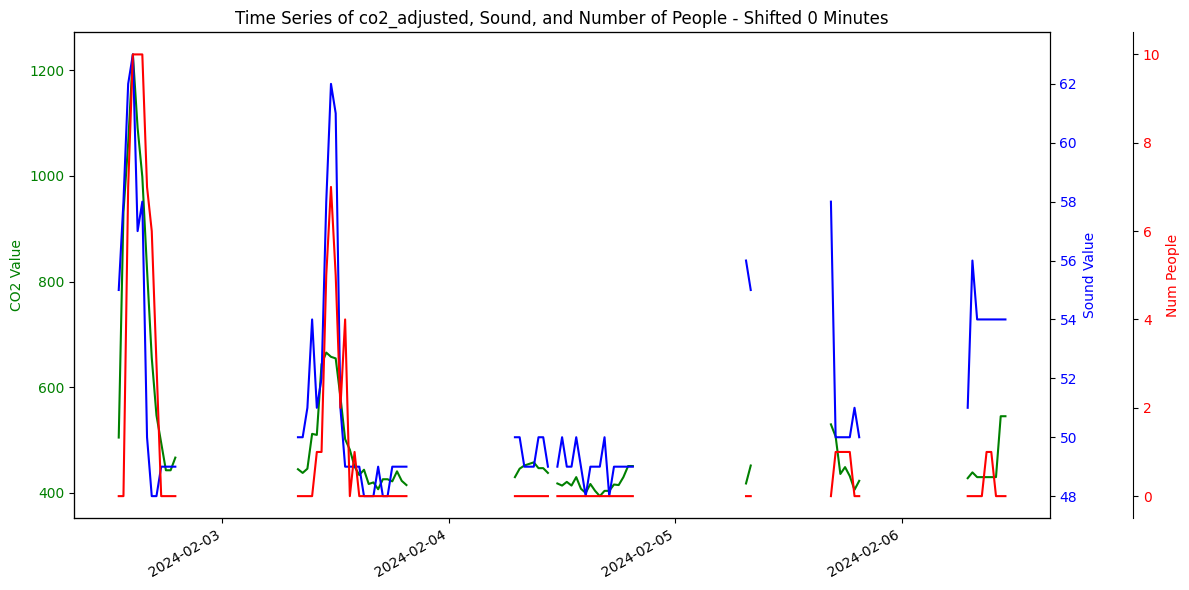

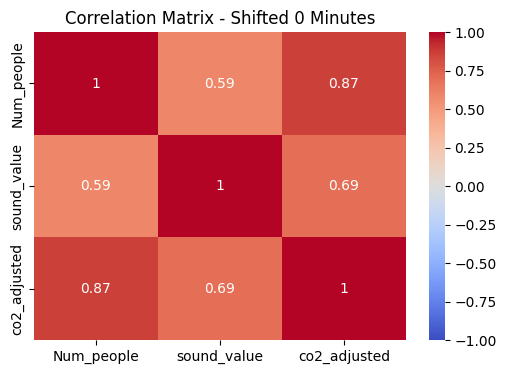


---------Processing file with 10 mins shift---------

Correlation between Num_people and co2_adjusted: 0.83
Correlation between Num_people and sound_value: 0.59
Correlation between sound_value and co2_adjusted: 0.71


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\64072176.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


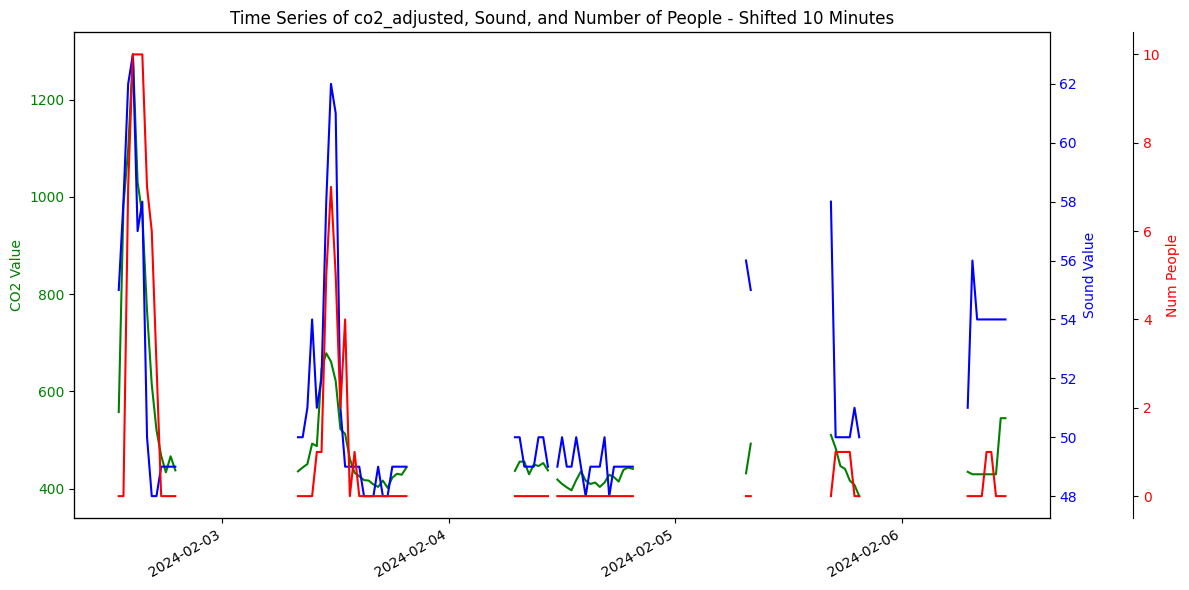

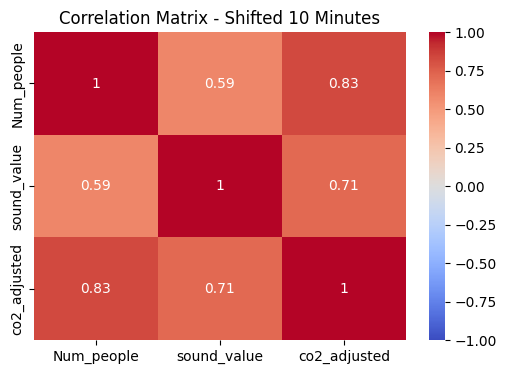


---------Processing file with 20 mins shift---------

Correlation between Num_people and co2_adjusted: 0.77
Correlation between Num_people and sound_value: 0.59
Correlation between sound_value and co2_adjusted: 0.73


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\64072176.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


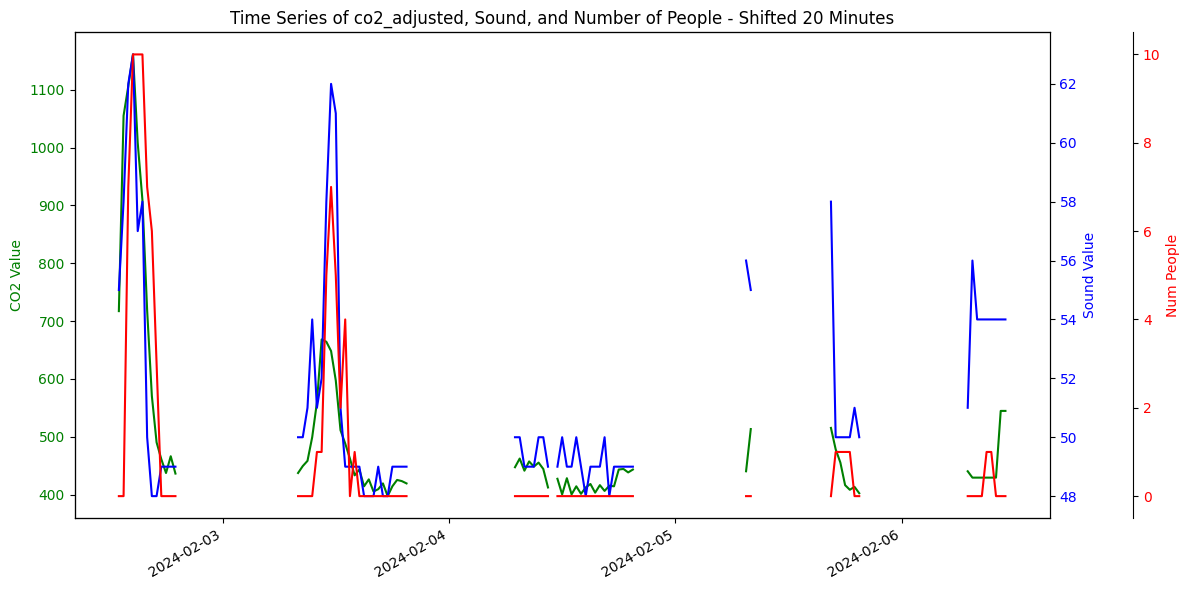

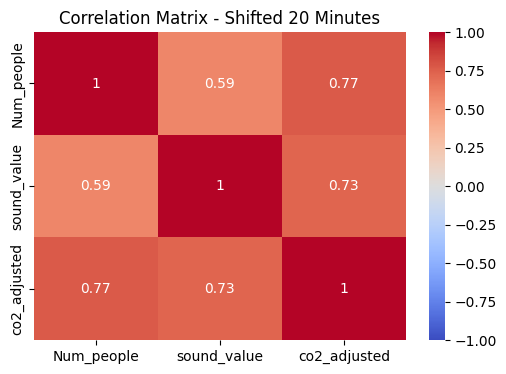


---------Processing file with 30 mins shift---------

Correlation between Num_people and co2_adjusted: 0.67
Correlation between Num_people and sound_value: 0.59
Correlation between sound_value and co2_adjusted: 0.72


C:\Users\dewmi\AppData\Local\Temp\ipykernel_19616\64072176.py:20: FutureWarning: 't' is deprecated and will be removed in a future version, please use 'min' instead.
  daily_data = sensor_data.set_index('time').resample('30t').mean()


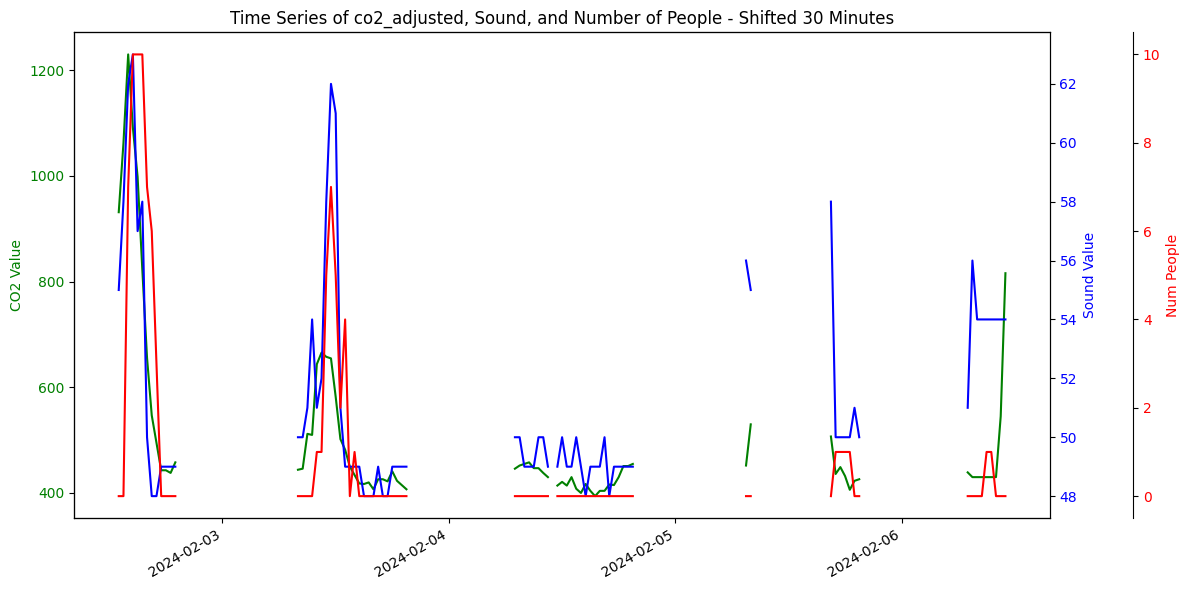

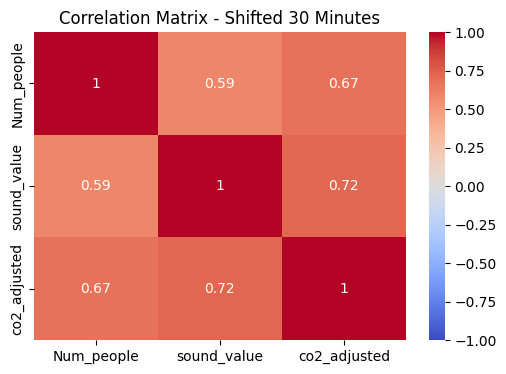

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.graph_objects as go


# Iterate over each file
for i in range(0,31,10): 

    print(f"\n---------Processing file with {i} mins shift---------\n")
    
    # Load the dataset
    sensor_data = pd.read_csv(f"Ventillation data/Full data ventillation effect with ground truth/Full_{i}_shift_groud truthNb_db_co2_vent.csv")

    # Ensure the 'time' column is in datetime format
    sensor_data['time'] = pd.to_datetime(sensor_data['time'])

    # Set the 'time' column as the index for resampling (daily mean)
    daily_data = sensor_data.set_index('time').resample('30t').mean()

    # Calculate correlations
    correlation_matrix = daily_data[['Num_people', 'sound_value', 'co2_adjusted']].corr()
    correlation_people_co2 = daily_data['Num_people'].corr(daily_data['co2_adjusted'])
    correlation_people_sound = daily_data['Num_people'].corr(daily_data['sound_value'])
    correlation_sound_co2 = daily_data['sound_value'].corr(daily_data['co2_adjusted'])

    # Print correlation values
    print(f"Correlation between Num_people and co2_adjusted: {correlation_people_co2:.2f}")
    print(f"Correlation between Num_people and sound_value: {correlation_people_sound:.2f}")
    print(f"Correlation between sound_value and co2_adjusted: {correlation_sound_co2:.2f}")

    # Plot Time Series for Num_people, sound_value, and co2_value
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot CO2 on primary y-axis
    ax1.plot(daily_data.index, daily_data['co2_adjusted'], color='green', label='CO2 Value')
    ax1.set_ylabel('CO2 Value', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create secondary y-axis for sound_value
    ax2 = ax1.twinx()
    ax2.plot(daily_data.index, daily_data['sound_value'], color='blue', label='Sound Value')
    ax2.set_ylabel('Sound Value', color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    # Create secondary y-axis for Num_people
    ax3 = ax1.twinx()
    ax3.spines['right'].set_position(('outward', 60))
    ax3.plot(daily_data.index, daily_data['Num_people'], color='red', label='Num People')
    ax3.set_ylabel('Num People', color='red')
    ax3.tick_params(axis='y', labelcolor='red')

    # Formatting the x-axis
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1)) 
    fig.autofmt_xdate()

    # Title and layout
    plt.title(f'Time Series of co2_adjusted, Sound, and Number of People - Shifted {i} Minutes')
    fig.tight_layout()

    # Show the plot
    plt.show()

    # Heatmap of the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Matrix - Shifted {i} Minutes')
    plt.show()



## Adding the ventillation effect to the original data set with yolo v3 results of same time interval as ground truth data set

### Data Preparation

In [ ]:
import pandas as pd

df_vent = pd.read_csv('Ventillation data/filtered_ventilation_data.csv', parse_dates=['time'])

for i in range(0,31,10): 
    # Read the second file (sound and CO2 data)
    df_sensors = pd.read_csv(f'Ground Truth For sumHumans/Yolov3 detection same interval/Final_{i}_shift_Yolo v3 detection nb_db_co2.csv', parse_dates=['time'])

    # Merge the DataFrames on the 'time' column using an inner join
    merged_df = pd.merge(df_vent[['time','ventilation_value']], df_sensors[['time', 'Num_people','sound_value', 'co2_value']], on='time', how='inner')

    merged_df['co2_adjusted'] = merged_df.apply(
    lambda row: row['co2_value'] - Ventillation_effect if row['ventilation_value'] == 5 else row['co2_value'] + Ventillation_effect,
    axis=1)


    # Save the merged data to a new CSV file
    merged_df.to_csv(f'Ventillation data/Full data ventillation with yolo datset/Full_{i}_shift_yolo v3 Nb_db_co2_vent.csv', index=False)

    print(merged_df.head(3))


## Checking poosible correlationships between sound and NB people

In [76]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import pingouin as pg
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression



# Function to calculate and print different correlation methods
def calculate_correlations(daily_data):
    # Handle missing data by forward-filling and backward-filling
    daily_data = daily_data.ffill().bfill()

    # Pearson Correlation (default)
    pearson_corr = daily_data['sound_value'].corr(daily_data['Num_people'])
    print(f"Pearson correlation between sound_value and Num_people: {pearson_corr:.2f}")

    # Spearman Rank Correlation
    spearman_corr = daily_data['sound_value'].corr(daily_data['Num_people'], method='spearman')
    print(f"Spearman correlation between sound_value and Num_people: {spearman_corr:.2f}")

    # Kendall Tau Correlation
    kendall_corr = daily_data['sound_value'].corr(daily_data['Num_people'], method='kendall')
    print(f"Kendall correlation between sound_value and Num_people: {kendall_corr:.2f}")

    # Mutual Information
    mi = mutual_info_regression(daily_data[['sound_value']], daily_data['Num_people'])
    print(f"Mutual information between sound_value and Num_people: {mi[0]:.2f}")

    # Polynomial Regression (Non-linear fit)
    poly = PolynomialFeatures(degree=8)  # Try quadratic or higher degree
    X_poly = poly.fit_transform(daily_data[['sound_value']])
    model = LinearRegression()
    model.fit(X_poly, daily_data['Num_people'])
    print(f"R-squared for polynomial regression: {model.score(X_poly, daily_data['Num_people']):.2f}")

    
# Load the dataset
sensor_data = pd.read_csv(f"Ventillation data/Full data ventillation effect with ground truth/Full_0_shift_groud truthNb_db_co2_vent.csv")

# Ensure the 'time' column is in datetime format
sensor_data['time'] = pd.to_datetime(sensor_data['time'])

# Set the 'time' column as the index for resampling (daily mean)
daily_data = sensor_data.set_index('time').resample('30min').mean()

# Call the function to calculate and print different correlations
calculate_correlations(daily_data)

    

Pearson correlation between sound_value and Num_people: 0.52
Spearman correlation between sound_value and Num_people: 0.29
Kendall correlation between sound_value and Num_people: 0.26
Mutual information between sound_value and Num_people: 0.11
R-squared for polynomial regression: 0.55


### Correlation Methods and Results

### 1. **Pearson Correlation**
- **Relationship it checks for**: Measures the strength and direction of a **linear** relationship between two continuous variables.
- **Result**: The Pearson correlation between `sound_value` and `Num_people` is **0.52**, indicating a **moderate positive linear relationship**, suggesting that as one variable increases, the other tends to increase as well.

### 2. **Spearman Rank Correlation**
- **Relationship it checks for**: Measures the strength and direction of a **monotonic** relationship between two variables, which may not necessarily be linear but can still show consistent directional trends (increasing or decreasing).
- **Result**: The Spearman correlation between `sound_value` and `Num_people` is **0.29**, indicating a **weak to moderate positive monotonic relationship**, meaning the variables tend to move in the same direction, but not necessarily in a linear manner.

### 3. **Kendall Tau Correlation**
- **Relationship it checks for**: Also measures the strength and direction of a **monotonic** relationship, similar to Spearman, but is more robust to ties in the data.
- **Result**: The Kendall Tau correlation between `sound_value` and `Num_people` is **0.26**, suggesting a **weak positive monotonic relationship**, with a more conservative estimate of association than Spearman.

### 4. **Mutual Information**
- **Relationship it checks for**: Measures the amount of **information shared** between two variables, capturing both linear and **non-linear dependencies** without assuming any specific relationship.
- **Result**: The mutual information between `sound_value` and `Num_people` is **0.14**, indicating a **weak dependency** between the two variables, with some shared information but not a strong relationship.

### 5. **R-squared for Polynomial Regression**
- **Relationship it checks for**: Assesses how well a **polynomial model** (non-linear) explains the variability of one variable (`Num_people`) based on another (`sound_value`).
- **Result**: The R-squared value for the polynomial regression is **0.49**, meaning that **49% of the variability** in `Num_people` can be explained by the `sound_value` in a **non-linear manner**, suggesting a moderately good fit for a quadratic relationship.


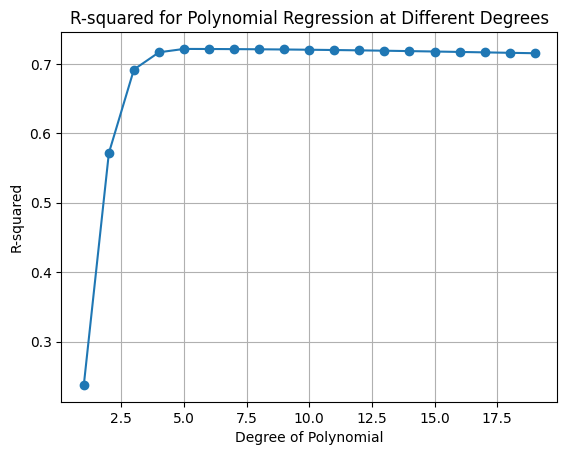

In [93]:
# Set 'time' column as the index and resample the data
daily_data = sensor_data.set_index('time').resample('120min').mean()

# Fill missing values using forward-fill
daily_data_filled = daily_data.ffill().bfill()

# List to store the R-squared values for different degrees
r_squared_values = []

iteration = 20

# Loop through different degrees from 1 to 10
for degree in range(1, iteration):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(daily_data_filled[['sound_value']])

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_poly, daily_data_filled['Num_people'])

    # Store the R-squared value
    r_squared_values.append(model.score(X_poly, daily_data_filled['Num_people']))

# Plot the results
plt.plot(range(1, iteration), r_squared_values, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R-squared')
plt.title('R-squared for Polynomial Regression at Different Degrees')
plt.grid(True)
plt.show()
